# Part 1-2: YouTube Data Analysis & Exploration

Collected data from YouTube channels to analyze cooking channels/shows. Need to first consolidate all of the data as they are in separate files due to the way the data was collected. This is a very long, messy notebook, please refer to the cleaner scripts and other notebooks, where I split this up into more concise topics. 

In [881]:
# library import
import pandas as pd
import numpy as np
import json
import seaborn as sns

## Grabbing the metadata

Just making sure I can get all the metadata, just the information I want, and format it for storing in a SQL DB later. 

In [882]:
with open('metadata/' + '__4q3Eq-jwk.info.json') as mtda:
    metadata = json.load(mtda)
    metadata = pd.DataFrame.from_dict(metadata, orient='index')
metadata.head()

,0
id,__4q3Eq-jwk
uploader,Chef Zee Cooks
uploader_id,UCJRL7sCfTsEpJXbk8C0gXtg
uploader_url,http://www.youtube.com/channel/UCJRL7sCfTsEpJX...
channel_id,UCJRL7sCfTsEpJXbk8C0gXtg


In [883]:
keepers = ['id', 'uploader', 'uploader_id', 'uploader_url', 'channel_id', 'channel_url', 
          'upload_date', 'title', 'thumbnail', 'description', 'categories', 'tags', 
          'duration', 'age_limit', 'view_count', 'like_count', 'dislike_count', 'average_rating']
clean_metadata = metadata.loc[keepers]
clean_metadata

,0
id,__4q3Eq-jwk
uploader,Chef Zee Cooks
uploader_id,UCJRL7sCfTsEpJXbk8C0gXtg
uploader_url,http://www.youtube.com/channel/UCJRL7sCfTsEpJX...
channel_id,UCJRL7sCfTsEpJXbk8C0gXtg
channel_url,http://www.youtube.com/channel/UCJRL7sCfTsEpJX...
upload_date,20170921
title,Healthy Caesar Salad | Healthy Recipes | Made ...
thumbnail,https://i.ytimg.com/vi/__4q3Eq-jwk/maxresdefau...
description,Caesar Salads are delicious and easy to make. ...


In [48]:
# Repeat for all files that have been downloaded & create a new dict with channel:video info
count=0
with open('youtube-dl-archive.txt') as ytdl:
    for line in ytdl:
        with open('metadata/' + line.strip() + '.info.json') as mtda:
            metadata = json.load(mtda)
        metadata = pd.DataFrame.from_dict(metadata, orient='index')
        clean_metadata = metadata.loc[keepers]
        channelid = clean_metadata.loc['channel_id'].values[0]
        videoid = clean_metadata.loc['id'].values[0]
        if count == 0:
            channels = pd.DataFrame.from_dict({'channel_id': channelid, 'videos': videoid}, orient='index').transpose()
        else:
            tempdf = pd.DataFrame.from_dict({'channel_id': channelid, 'videos': videoid}, orient='index').transpose()
            channels = channels.append(tempdf)
        count +=1
channels.head()

,channel_id,videos
0,UCEXuL6SujEWEfZlSumjrYrw,--57jPUspOg
0,UCJFp8uSYCjXOMnkUyb3CQ3Q,--DxZjSOOz0
0,UCEXuL6SujEWEfZlSumjrYrw,-02GSBr6TbA
0,UCKEPJo5eTHbKDgHxvUSR9Jw,-1H7b4sVyyE
0,UCdNz03L-XqXrPFHnaMnLZeA,-29JBoKuN2c


## Getting the comment data

Going through the comment files to make sure I can get all the info I want. Collecting some stats on channels' overall comment history, creating a simple cleaned comment set, combining all channel comments into a single string for further exploration.

In [107]:
#Analyzing 
#"Cooking with Sros" UCHp19YI5Alff6jfadPx4l6Q - calm, happy
# You suck at cooking UCekQr9znsk2vWxBo3YiLq2w - funny, sarcastic
# Almazan kitchen UCVVAnxQ2YMC_qlc7QfPA2YQ - calm, relaxing
# Bon apetit - UCbpMy0Fg74eXXkvxJrtEn3w - 

channel = ['UCHp19YI5Alff6jfadPx4l6Q','UCekQr9znsk2vWxBo3YiLq2w', 'UCVVAnxQ2YMC_qlc7QfPA2YQ', 'UCbpMy0Fg74eXXkvxJrtEn3w']
vids = channels.loc[channels['channel_id'] in channel]

vids['merged_comments']= ''
vids['comments'] = [[] for _ in range(len(vids))]
vids['tot_likes'] = 0
vids['tot_dislikes'] = 0
vids['tot_text_len'] = 0

vids.head()

/Users/kristenbrown/miniconda3/envs/datasci/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/kristenbrown/miniconda3/envs/datasci/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/kristenbrown/miniconda3/envs/datasci/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c

,channel_id,videos,merged_comments,comments,tot_likes,tot_dislikes,tot_text_len
0,UCHp19YI5Alff6jfadPx4l6Q,-g53OpxPWlI,,[],0,0,0
0,UCHp19YI5Alff6jfadPx4l6Q,-hLc8nOgI80,,[],0,0,0
0,UCHp19YI5Alff6jfadPx4l6Q,-qSyCYZbFY8,,[],0,0,0
0,UCHp19YI5Alff6jfadPx4l6Q,-uHaDgBgJ1U,,[],0,0,0
0,UCHp19YI5Alff6jfadPx4l6Q,0-n1QBeVFN8,,[],0,0,0


In [108]:
num=0
for vid in vids['videos'].values:
    num +=1
    if num > 10:
        break
    lines = 0
    # all comment files have a newline character in them.... >.<
    with open('/Users/kristenbrown/Documents/GitHub/youtube-data/video_info/comments/'+vid+'\n_comments.json') as cm:
        for line in cm:
            lines += 1
            singlecom = pd.DataFrame.from_dict(json.loads(line), orient='index')
            merged_com = vids.loc[vids['videos'] == vid,'merged_comments'].values[0] + str(singlecom.loc['text'].values[0])
            comlist = vids.loc[vids['videos'] == vid,'comments'] + [singlecom.loc['text'].values[0]]
                                                                                           
            vids.loc[vids['videos'] == vid,'merged_comments'] = merged_com
            vids.loc[vids['videos'] == vid,'comments'] = comlist
            vids.loc[vids['videos'] == vid,'tot_likes'] += int(singlecom.loc['clikes'])
            vids.loc[vids['videos'] == vid,'tot_dislikes'] += int(singlecom.loc['cdislikes'])
            vids.loc[vids['videos'] == vid,'tot_text_len'] += len(singlecom.loc['text'].values[0])
            
            if lines != 0:
                vids.loc[vids['videos'] == vid,'avg_likes'] = vids.loc[vids['videos'] == vid,'tot_likes']/lines
                vids.loc[vids['videos'] == vid,'avg_dislikes'] = int(singlecom.loc['cdislikes'])/lines
                vids.loc[vids['videos'] == vid,'tot_comments'] = lines
                vids.loc[vids['videos'] == vid,'avg_text_len'] = vids.loc[vids['videos'] == vid,'tot_text_len']/lines        

In [1035]:
lines=0
count = 0
with open('/Users/kristenbrown/Documents/GitHub/youtube-data/video_info/comments/'+vid+'\n_comments.json') as cm:
    for line in cm:
        singlecom = pd.DataFrame.from_dict(json.loads(line), orient='index').transpose()
        singlecom['video_id'] = vid
        singlecom['desc'] = '-'
        singlecom['category'] = '-'
        
        if lines == 0:
            comments = singlecom
            lines +=1
        elif lines%3 == 0:
            print('hello')
            count += 1
            lines = 0
        else:
            comments = comments.append(singlecom)
            lines += 1
        print('lines: ', lines, '\n', 'count:', count)
comments.head()
    

lines:  1 
 count: 0
lines:  2 
 count: 0
lines:  3 
 count: 0
hello
lines:  0 
 count: 1
lines:  1 
 count: 1
lines:  2 
 count: 1
lines:  3 
 count: 1
hello
lines:  0 
 count: 2
lines:  1 
 count: 2
lines:  2 
 count: 2
lines:  3 
 count: 2
hello
lines:  0 
 count: 3
lines:  1 
 count: 3
lines:  2 
 count: 3
lines:  3 
 count: 3
hello
lines:  0 
 count: 4
lines:  1 
 count: 4
lines:  2 
 count: 4
lines:  3 
 count: 4
hello
lines:  0 
 count: 5
lines:  1 
 count: 5
lines:  2 
 count: 5
lines:  3 
 count: 5
hello
lines:  0 
 count: 6
lines:  1 
 count: 6
lines:  2 
 count: 6
lines:  3 
 count: 6
hello
lines:  0 
 count: 7
lines:  1 
 count: 7
lines:  2 
 count: 7
lines:  3 
 count: 7
hello
lines:  0 
 count: 8
lines:  1 
 count: 8
lines:  2 
 count: 8
lines:  3 
 count: 8
hello
lines:  0 
 count: 9
lines:  1 
 count: 9
lines:  2 
 count: 9
lines:  3 
 count: 9
hello
lines:  0 
 count: 10
lines:  1 
 count: 10
lines:  2 
 count: 10
lines:  3 
 count: 10
hello
lines:  0 
 count: 11
lines

,cid,text,time,author,clikes,cdislikes,video_id,desc,category
0,Ugwfs7hK97Ux26f8WBF4AaABAg,HUNGRY!,9 months ago,Born Invincible,1,0,50cMrTA26tw,-,-


In [109]:
vids.set_index('videos', inplace=True)
vids.head()

,channel_id,merged_comments,comments,tot_likes,tot_dislikes,tot_text_len,avg_likes,avg_dislikes,tot_comments,avg_text_len
videos,,,,,,,,,,
-g53OpxPWlI,UCHp19YI5Alff6jfadPx4l6Q,Awesome. Cooking is #1. And I must add that...,[Awesome. Cooking is #1. And I must add tha...,224,0,6781,1.483444,0.0,151.0,44.907285
-hLc8nOgI80,UCHp19YI5Alff6jfadPx4l6Q,"I never know that this plant can be eaten, i j...","[I never know that this plant can be eaten, i ...",1074,0,34380,2.261053,0.0,475.0,72.378947
-qSyCYZbFY8,UCHp19YI5Alff6jfadPx4l6Q,Looking at the cooking ingredients and the rin...,[Looking at the cooking ingredients and the ri...,278,0,8006,1.695122,0.0,164.0,48.817073
-uHaDgBgJ1U,UCHp19YI5Alff6jfadPx4l6Q,"Я подумала,что это скальп инопланетянина,молод...","[Я подумала,что это скальп инопланетянина,моло...",303,0,9124,1.751445,0.0,173.0,52.739884
0-n1QBeVFN8,UCHp19YI5Alff6jfadPx4l6Q,Ese niño finge que come y en realidad la bota ...,[Ese niño finge que come y en realidad la bota...,913,0,26004,2.305556,0.0,396.0,65.666667


In [115]:
# merge all comments
allcomments = ' '.join(vids.loc[:, 'merged_comments'])
allcomments = allcomments.replace(".","")
allcomments = allcomments.replace(",","")
allcomments = allcomments.replace(":","")
allcomments = allcomments.replace("\"","")
allcomments = allcomments.replace("!","")
allcomments = allcomments.replace("â€œ","")
allcomments = allcomments.replace("â€˜","")
allcomments = allcomments.replace("*","")
allcomments = allcomments.lower()

In [152]:
# merge all comments
allcomments = vids.loc[:, 'merged_comments']

count = 0
for com in allcomments:
    if count == 1:
        com = ' '.join(com)
    com = com.replace(".","")
    com = com.replace(",","")
    com = com.replace(":","")
    com = com.replace("\"","")
    com = com.replace("!","")
    com = com.replace("â€œ","")
    com = com.replace("â€˜","")
    com = com.replace("*","")
    com = com.lower()
    allcomments[count] = com
    count += 1

/Users/kristenbrown/miniconda3/envs/datasci/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [ ]:
import nltk
from nltk.corpus import words
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize

en_stops = set(stopwords.words('english'))

In [154]:
count = 0
for merged in allcomments:
    final_merged = []
    #filtered = []
    for word in merged.split():
        if word in words.words():
            final_merged.append(word)
       # else:
       #     filtered.append(word)
    allcomments[count] = final_merged
    count += 1

/Users/kristenbrown/miniconda3/envs/datasci/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [112]:
final_merged_text = ' '.join(final_merged)
final_merged_text[:10]

'awesome cooking must add knife awesome trying find one god bless take dog eu de eu cobra quintal e m'

In [156]:
allcomments[:10].to_csv('ten_srocooking_comments.csv')
allcomments[:10]

/Users/kristenbrown/miniconda3/envs/datasci/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


videos
-g53OpxPWlI    [awesome, cooking, is, and, i, must, add, that...
-hLc8nOgI80    [awesome, cooking, is, and, i, must, add, that...
-qSyCYZbFY8    [looking, at, the, cooking, and, the, ring, sh...
-uHaDgBgJ1U    [eating, is, unhealthy, how, much, more, the, ...
0-n1QBeVFN8    [come, y, en, la, bota, did, you, wash, the, i...
0DGYl6wPNOI    [fora, a, eu, em, and, van, a, no, las, a, lit...
0DmcFJQZ324    [great, job, delicious, wish, i, could, join, ...
0H_f9Zig59c    [you, eat, the, toe, part, just, the, foot, ne...
0IPhcAr7zGc    [who, are, your, love, your, i, know, to, fry,...
0YR6s-x2KZk    [rip, you, do, in, a, like, the, girl, who, fa...
Name: merged_comments, dtype: object

In [181]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(stop_words=en_stops, max_features=100)
# tokenize and build vocab
vectorizer.fit(allcomments[5])
# summarize
print(vectorizer.vocabulary_)
# encode document
vector = vectorizer.transform(allcomments[5])

{'eu': 20, 'little': 44, 'watching': 95, 'like': 43, 'thanks': 82, 'want': 93, 'eat': 16, 'video': 92, 'know': 42, 'people': 63, 'hate': 36, 'hard': 35, 'lot': 46, 'pregnant': 64, 'see': 74, 'make': 48, 'cooking': 6, 'look': 45, 'easy': 15, 'love': 47, 'thank': 81, 'one': 59, 'food': 24, 'interesting': 41, 'totally': 88, 'try': 90, 'going': 30, 'yummy': 99, 'sick': 76, 'part': 61, 'egg': 18, 'tell': 80, 'never': 57, 'eating': 17, 'chicken': 3, 'guess': 34, 'right': 69, 'pass': 62, 'think': 83, 'also': 0, 'ovary': 60, 'taste': 79, 'wondering': 97, 'much': 54, 'got': 32, 'something': 77, 'new': 58, 'delicious': 11, 'would': 98, 'thought': 85, 'today': 87, 'dish': 13, 'recipe': 66, 'said': 70, 'throw': 86, 'enjoying': 19, 'favorite': 22, 'always': 1, 'really': 65, 'good': 31, 'amazing': 2, 'different': 12, 'find': 23, 'dont': 14, 'family': 21, 'dear': 10, 'though': 84, 'us': 91, 'friend': 27, 'remember': 67, 'granny': 33, 'maybe': 50, 'could': 7, 'waste': 94, 'respect': 68, 'curry': 8, 'g

In [182]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_trans = TfidfTransformer(smooth_idf=True, use_idf=True)
tfidf_trans.fit(vector)

TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True)

In [213]:
vids = channels.sample(100)
vids['merged_comments']= ''
vids['comments'] = [[] for _ in range(len(vids))]
vids['tot_likes'] = 0
vids['tot_dislikes'] = 0
vids['tot_text_len'] = 0
vids['emojis'] = [[] for _ in range(len(vids))]

vids.head()

,channel_id,videos,merged_comments,comments,tot_likes,tot_dislikes,tot_text_len,emojis
0,UCVVAnxQ2YMC_qlc7QfPA2YQ,50cMrTA26tw,,[],0,0,0,[]
0,UCJFp8uSYCjXOMnkUyb3CQ3Q,ALgD_Rg7xVA,,[],0,0,0,[]
0,UCJFp8uSYCjXOMnkUyb3CQ3Q,6aYGAPv2sFs,,[],0,0,0,[]
0,UCWP5zYusIJqJCK27A0NlAKg,5FNY9qMOpdY,,[],0,0,0,[]
0,UCKnRNV6x7s-ZSDfYPATq7cQ,-5f5TAyseCE,,[],0,0,0,[]


In [214]:
num=0
for vid in vids['videos'].values:
    num +=1
    if num % 10:
        print(num)

    # all comment files have a newline character in them.... >.<
    with open('/Users/kristenbrown/Documents/GitHub/youtube-data/video_info/comments/'+vid+'\n_comments.json') as cm:
        lines = 0
        for line in cm:
            singlecom = pd.DataFrame.from_dict(json.loads(line), orient='index')
            merged_com = vids.loc[vids['videos'] == vid,'merged_comments'].values[0] + str(singlecom.loc['text'].values[0])
            comlist = vids.loc[vids['videos'] == vid,'comments'] + [singlecom.loc['text'].values[0]]
            emojiset = vids.loc[vids['videos'] == vid,'emojis'] + [emojis.get(singlecom.loc['text'].values[0])]

            vids.loc[vids['videos'] == vid,'merged_comments'] = merged_com
            vids.loc[vids['videos'] == vid,'comments'] = comlist
            vids.loc[vids['videos'] == vid,'tot_likes'] += int(singlecom.loc['clikes'])
            vids.loc[vids['videos'] == vid,'tot_dislikes'] += int(singlecom.loc['cdislikes'])
            vids.loc[vids['videos'] == vid,'tot_text_len'] += len(singlecom.loc['text'].values[0])
            vids.loc[vids['videos'] == vid,'emojis'] = emojiset
            lines +=1   
            
            if lines > 0:
                vids.loc[vids['videos'] == vid,'avg_likes'] = vids.loc[vids['videos'] == vid,'tot_likes']/lines
                vids.loc[vids['videos'] == vid,'avg_dislikes'] = int(singlecom.loc['cdislikes'])/lines
                vids.loc[vids['videos'] == vid,'tot_comments'] = lines
                vids.loc[vids['videos'] == vid,'avg_text_len'] = vids.loc[vids['videos'] == vid,'tot_text_len']/lines        

1
2
3
4
5
6
7
8
9
11
12
13
14
15
16
17
18
19
21
22
23
24
25
26
27
28
29
31
32
33
34
35
36
37
38
39
41
42
43
44
45
46
47
48
49
51
52
53
54
55
56
57
58
59
61
62
63
64
65
66
67
68
69
71
72
73
74
75
76
77
78
79
81
82
83
84
85
86
87
88
89
91
92
93
94
95
96
97
98
99


In [172]:
import emojis

emote = emojis.db.get_emojis_by_category('Smileys & Emotion')
for e in emote:
    print(e)

In [197]:
emojis.get('emojitest')
len(comlist)

1

In [215]:
vids.head()

,channel_id,videos,merged_comments,comments,tot_likes,tot_dislikes,tot_text_len,emojis,avg_likes,avg_dislikes,tot_comments,avg_text_len
0,UCVVAnxQ2YMC_qlc7QfPA2YQ,50cMrTA26tw,I just ate and this video makes me hungryThat ...,"[I just ate and this video makes me hungry, Th...",940,0,31223,"[{}, {}, {}, {😃, 👍, 😏}, {}, {}, {}, {}, {}, {}...",2.151030,0.0,437.0,71.448513
0,UCJFp8uSYCjXOMnkUyb3CQ3Q,ALgD_Rg7xVA,The thumbnail is too cuteYou’re supposed to ke...,"[The thumbnail is too cute, You’re supposed to...",7392,0,27786,"[{}, {}, {}, {🤩}, {}, {}, {}, {😂}, {}, {}, {},...",14.133843,0.0,523.0,53.128107
0,UCJFp8uSYCjXOMnkUyb3CQ3Q,6aYGAPv2sFs,2:07I was expecting a bunch of different kinds...,"[2:07, I was expecting a bunch of different ki...",1948,0,31498,"[{}, {}, {}, {}, {}, {😑, 😅, 😂}, {}, {}, {}, {}...",4.821782,0.0,404.0,77.965347
0,UCWP5zYusIJqJCK27A0NlAKg,5FNY9qMOpdY,Jeff. The absolutely BEST stuffiing in the wo...,[Jeff. The absolutely BEST stuffiing in the w...,462,0,31473,"[{}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {...",2.044248,0.0,226.0,139.261062
0,UCKnRNV6x7s-ZSDfYPATq7cQ,-5f5TAyseCE,dekhne m acha n lag raha h to khane me kaise a...,[dekhne m acha n lag raha h to khane me kaise ...,20,0,947,"[{}, {}, {}, {}, {}, {}, {}, {😇}, {}, {😘, 😊, 💗...",1.000000,0.0,20.0,47.350000


In [223]:
vids['tot_comments'].sum()
vids.head()

,channel_id,videos,merged_comments,comments,tot_likes,tot_dislikes,tot_text_len,emojis,avg_likes,avg_dislikes,tot_comments,avg_text_len
0,UCVVAnxQ2YMC_qlc7QfPA2YQ,50cMrTA26tw,I just ate and this video makes me hungryThat ...,"[I just ate and this video makes me hungry, Th...",940,0,31223,"[{}, {}, {}, {😃, 👍, 😏}, {}, {}, {}, {}, {}, {}...",2.151030,0.0,437.0,71.448513
0,UCJFp8uSYCjXOMnkUyb3CQ3Q,ALgD_Rg7xVA,The thumbnail is too cuteYou’re supposed to ke...,"[The thumbnail is too cute, You’re supposed to...",7392,0,27786,"[{}, {}, {}, {🤩}, {}, {}, {}, {😂}, {}, {}, {},...",14.133843,0.0,523.0,53.128107
0,UCJFp8uSYCjXOMnkUyb3CQ3Q,6aYGAPv2sFs,2:07I was expecting a bunch of different kinds...,"[2:07, I was expecting a bunch of different ki...",1948,0,31498,"[{}, {}, {}, {}, {}, {😑, 😅, 😂}, {}, {}, {}, {}...",4.821782,0.0,404.0,77.965347
0,UCWP5zYusIJqJCK27A0NlAKg,5FNY9qMOpdY,Jeff. The absolutely BEST stuffiing in the wo...,[Jeff. The absolutely BEST stuffiing in the w...,462,0,31473,"[{}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {...",2.044248,0.0,226.0,139.261062
0,UCKnRNV6x7s-ZSDfYPATq7cQ,-5f5TAyseCE,dekhne m acha n lag raha h to khane me kaise a...,[dekhne m acha n lag raha h to khane me kaise ...,20,0,947,"[{}, {}, {}, {}, {}, {}, {}, {😇}, {}, {😘, 😊, 💗...",1.000000,0.0,20.0,47.350000


In [251]:
for vid in vids['videos'].values:
    emojiset = vids.loc[vids['videos'] == vid, 'emojis']
    num=0
    for e in emojiset:
        newmoji = [list(x) for x in emojiset[num]]
        emojiset[num] = newmoji
        num+=1
    vids.loc[vids['videos'] == vid, 'emojis'] = emojiset


KeyError: 0

In [252]:
vids.reset_index(drop=True, inplace=True)
vids.head()

,index,channel_id,videos,merged_comments,comments,tot_likes,tot_dislikes,tot_text_len,emojis,avg_likes,avg_dislikes,tot_comments,avg_text_len
0,0,UCVVAnxQ2YMC_qlc7QfPA2YQ,50cMrTA26tw,I just ate and this video makes me hungryThat ...,"[I just ate and this video makes me hungry, Th...",940,0,31223,"[[], [], [], [😃, 👍, 😏], [], [], [], [], [], []...",2.151030,0.0,437.0,71.448513
1,0,UCJFp8uSYCjXOMnkUyb3CQ3Q,ALgD_Rg7xVA,The thumbnail is too cuteYou’re supposed to ke...,"[The thumbnail is too cute, You’re supposed to...",7392,0,27786,"[[], [], [], [🤩], [], [], [], [😂], [], [], [],...",14.133843,0.0,523.0,53.128107
2,0,UCJFp8uSYCjXOMnkUyb3CQ3Q,6aYGAPv2sFs,2:07I was expecting a bunch of different kinds...,"[2:07, I was expecting a bunch of different ki...",1948,0,31498,"[[], [], [], [], [], [😑, 😅, 😂], [], [], [], []...",4.821782,0.0,404.0,77.965347
3,0,UCWP5zYusIJqJCK27A0NlAKg,5FNY9qMOpdY,Jeff. The absolutely BEST stuffiing in the wo...,[Jeff. The absolutely BEST stuffiing in the w...,462,0,31473,"[[], [], [], [], [], [], [], [], [], [], [], [...",2.044248,0.0,226.0,139.261062
4,0,UCKnRNV6x7s-ZSDfYPATq7cQ,-5f5TAyseCE,dekhne m acha n lag raha h to khane me kaise a...,[dekhne m acha n lag raha h to khane me kaise ...,20,0,947,"[[], [], [], [], [], [], [], [😇], [], [😘, 😊, 💗...",1.000000,0.0,20.0,47.350000


In [279]:
# thank you MaxU, https://stackoverflow.com/a/48532692/4909087
com = pd.DataFrame({
      col:np.repeat(vids[col].values, vids['comments'].str.len())
      for col in vids.columns.drop('comments')}
    ).assign(**{'comments':np.concatenate(vids['comments'].values)})[vids.columns]
com.drop('emojis', 1, inplace=True)
com.head()

,index,channel_id,videos,merged_comments,comments,tot_likes,tot_dislikes,tot_text_len,avg_likes,avg_dislikes,tot_comments,avg_text_len
0,0,UCVVAnxQ2YMC_qlc7QfPA2YQ,50cMrTA26tw,I just ate and this video makes me hungryThat ...,I just ate and this video makes me hungry,940,0,31223,2.15103,0.0,437.0,71.448513
1,0,UCVVAnxQ2YMC_qlc7QfPA2YQ,50cMrTA26tw,I just ate and this video makes me hungryThat ...,That looks so freakin good!,940,0,31223,2.15103,0.0,437.0,71.448513
2,0,UCVVAnxQ2YMC_qlc7QfPA2YQ,50cMrTA26tw,I just ate and this video makes me hungryThat ...,Could you please get us the recipes for the sp...,940,0,31223,2.15103,0.0,437.0,71.448513
3,0,UCVVAnxQ2YMC_qlc7QfPA2YQ,50cMrTA26tw,I just ate and this video makes me hungryThat ...,Your channel is f***ing amazing 😃😃👍 Keep going 😏,940,0,31223,2.15103,0.0,437.0,71.448513
4,0,UCVVAnxQ2YMC_qlc7QfPA2YQ,50cMrTA26tw,I just ate and this video makes me hungryThat ...,Give me a napkin. My mouth is watering.,940,0,31223,2.15103,0.0,437.0,71.448513


In [280]:
def emojilist(x):
    emoj = emojis.get(x)
    return list(emoj)

emoj = com['comments'].apply(emojilist)
emoj.head()

0           []
1           []
2           []
3    [😃, 👍, 😏]
4           []
Name: comments, dtype: object

In [281]:
com['emojis'] = com['comments'].apply(emojilist)
com.head()

,index,channel_id,videos,merged_comments,comments,tot_likes,tot_dislikes,tot_text_len,avg_likes,avg_dislikes,tot_comments,avg_text_len,emojis
0,0,UCVVAnxQ2YMC_qlc7QfPA2YQ,50cMrTA26tw,I just ate and this video makes me hungryThat ...,I just ate and this video makes me hungry,940,0,31223,2.15103,0.0,437.0,71.448513,[]
1,0,UCVVAnxQ2YMC_qlc7QfPA2YQ,50cMrTA26tw,I just ate and this video makes me hungryThat ...,That looks so freakin good!,940,0,31223,2.15103,0.0,437.0,71.448513,[]
2,0,UCVVAnxQ2YMC_qlc7QfPA2YQ,50cMrTA26tw,I just ate and this video makes me hungryThat ...,Could you please get us the recipes for the sp...,940,0,31223,2.15103,0.0,437.0,71.448513,[]
3,0,UCVVAnxQ2YMC_qlc7QfPA2YQ,50cMrTA26tw,I just ate and this video makes me hungryThat ...,Your channel is f***ing amazing 😃😃👍 Keep going 😏,940,0,31223,2.15103,0.0,437.0,71.448513,"[😃, 👍, 😏]"
4,0,UCVVAnxQ2YMC_qlc7QfPA2YQ,50cMrTA26tw,I just ate and this video makes me hungryThat ...,Give me a napkin. My mouth is watering.,940,0,31223,2.15103,0.0,437.0,71.448513,[]


In [288]:
#from emojis import UNICODE_EMOJI

def rem_emoji(comment, emojis):
    cleaned = comment
    for e in emojis:
        cleaned = cleaned.replace(e, "")
    return cleaned

com2 = [rem_emoji(x, y) for x, y in zip(com['comments'], com['emojis'])]
com['comments'] = com2
com.head()

,index,channel_id,videos,merged_comments,comments,tot_likes,tot_dislikes,tot_text_len,avg_likes,avg_dislikes,tot_comments,avg_text_len,emojis
0,0,UCVVAnxQ2YMC_qlc7QfPA2YQ,50cMrTA26tw,I just ate and this video makes me hungryThat ...,I just ate and this video makes me hungry,940,0,31223,2.15103,0.0,437.0,71.448513,[]
1,0,UCVVAnxQ2YMC_qlc7QfPA2YQ,50cMrTA26tw,I just ate and this video makes me hungryThat ...,That looks so freakin good!,940,0,31223,2.15103,0.0,437.0,71.448513,[]
2,0,UCVVAnxQ2YMC_qlc7QfPA2YQ,50cMrTA26tw,I just ate and this video makes me hungryThat ...,Could you please get us the recipes for the sp...,940,0,31223,2.15103,0.0,437.0,71.448513,[]
3,0,UCVVAnxQ2YMC_qlc7QfPA2YQ,50cMrTA26tw,I just ate and this video makes me hungryThat ...,Your channel is f***ing amazing Keep going,940,0,31223,2.15103,0.0,437.0,71.448513,"[😃, 👍, 😏]"
4,0,UCVVAnxQ2YMC_qlc7QfPA2YQ,50cMrTA26tw,I just ate and this video makes me hungryThat ...,Give me a napkin. My mouth is watering.,940,0,31223,2.15103,0.0,437.0,71.448513,[]


In [301]:
com['num_emojis'] = com['emojis'].apply(len)
com.head()

,index,channel_id,videos,merged_comments,comments,tot_likes,tot_dislikes,tot_text_len,avg_likes,avg_dislikes,tot_comments,avg_text_len,emojis,num_emojis
0,0,UCVVAnxQ2YMC_qlc7QfPA2YQ,50cMrTA26tw,I just ate and this video makes me hungryThat ...,I just ate and this video makes me hungry,940,0,31223,2.15103,0.0,437.0,71.448513,[],0
1,0,UCVVAnxQ2YMC_qlc7QfPA2YQ,50cMrTA26tw,I just ate and this video makes me hungryThat ...,That looks so freakin good!,940,0,31223,2.15103,0.0,437.0,71.448513,[],0
2,0,UCVVAnxQ2YMC_qlc7QfPA2YQ,50cMrTA26tw,I just ate and this video makes me hungryThat ...,Could you please get us the recipes for the sp...,940,0,31223,2.15103,0.0,437.0,71.448513,[],0
3,0,UCVVAnxQ2YMC_qlc7QfPA2YQ,50cMrTA26tw,I just ate and this video makes me hungryThat ...,Your channel is f***ing amazing Keep going,940,0,31223,2.15103,0.0,437.0,71.448513,"[😃, 👍, 😏]",3
4,0,UCVVAnxQ2YMC_qlc7QfPA2YQ,50cMrTA26tw,I just ate and this video makes me hungryThat ...,Give me a napkin. My mouth is watering.,940,0,31223,2.15103,0.0,437.0,71.448513,[],0


In [303]:
emoji_com = com.loc[com['num_emojis'] > 0]
emoji_com.head()
emoji_com.shape

(15288, 14)

## Creating and populating a database

To access the data quickly once it is all collected and cleaned, I will need to put it into a database. I would like to create a database containing the following tables of information:


Channels: A table of channels, videos within the channel, other metadata, and potentially reddit insights

Videos: A table of videos, their metadata, and comments


In [217]:
from sqlalchemy import create_engine
from sqlalchemy_utils import database_exists, create_database
import psycopg2

dbname = 'cookyt_db'
username = 'kristenbrown' # change this to your username
engine = create_engine('postgres://%s@localhost/%s'%(username,dbname))
print(engine.url)

if not database_exists(engine.url):
    create_database(engine.url)
print(database_exists(engine.url))

connection = engine.connect()

/Users/kristenbrown/miniconda3/envs/datasci/lib/python3.7/site-packages/sqlalchemy/sql/functions.py:68: SAWarning: The GenericFunction 'array_agg' is already registered and is going to be overriden.
  "is going to be overriden.".format(identifier))


postgres://kristenbrown@localhost/cookyt_db
True


In [304]:
# Add sample dataset to SQL
com.to_sql('comments', con=connection, if_exists='append', index=False)

In [300]:
from sqlalchemy import create_engine
from sqlalchemy import MetaData
from sqlalchemy import inspect
from sqlalchemy import Table
from sqlalchemy import Column, Integer, String
from sqlalchemy.engine.url import URL

#m = MetaData()
#table = Table('comments',m)
#table.drop(engine)

[]


In [306]:
inspector = inspect(engine)
print(inspector.get_table_names())

['comments']


In [309]:
### stopped here to restart notebook, picking up again with a saved pickle file 
com.to_pickle('comments.pkl')

## More text-preprocessing

Pre-processing the comment data even further for classification. 

In [13]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
import math



In [2]:
import pickle

with open('comments.pkl', 'rb') as com:
    comments = pickle.load(com)
comments.head()

,index,channel_id,videos,merged_comments,comments,tot_likes,tot_dislikes,tot_text_len,avg_likes,avg_dislikes,tot_comments,avg_text_len,emojis,num_emojis
0,0,UCVVAnxQ2YMC_qlc7QfPA2YQ,50cMrTA26tw,I just ate and this video makes me hungryThat ...,I just ate and this video makes me hungry,940,0,31223,2.15103,0.0,437.0,71.448513,[],0
1,0,UCVVAnxQ2YMC_qlc7QfPA2YQ,50cMrTA26tw,I just ate and this video makes me hungryThat ...,That looks so freakin good!,940,0,31223,2.15103,0.0,437.0,71.448513,[],0
2,0,UCVVAnxQ2YMC_qlc7QfPA2YQ,50cMrTA26tw,I just ate and this video makes me hungryThat ...,Could you please get us the recipes for the sp...,940,0,31223,2.15103,0.0,437.0,71.448513,[],0
3,0,UCVVAnxQ2YMC_qlc7QfPA2YQ,50cMrTA26tw,I just ate and this video makes me hungryThat ...,Your channel is f***ing amazing Keep going,940,0,31223,2.15103,0.0,437.0,71.448513,"[😃, 👍, 😏]",3
4,0,UCVVAnxQ2YMC_qlc7QfPA2YQ,50cMrTA26tw,I just ate and this video makes me hungryThat ...,Give me a napkin. My mouth is watering.,940,0,31223,2.15103,0.0,437.0,71.448513,[],0


In [3]:
emoji_com = comments.loc[comments['num_emojis'] > 0]
emoji_com.head()

,index,channel_id,videos,merged_comments,comments,tot_likes,tot_dislikes,tot_text_len,avg_likes,avg_dislikes,tot_comments,avg_text_len,emojis,num_emojis
3,0,UCVVAnxQ2YMC_qlc7QfPA2YQ,50cMrTA26tw,I just ate and this video makes me hungryThat ...,Your channel is f***ing amazing Keep going,940,0,31223,2.15103,0.0,437.0,71.448513,"[😃, 👍, 😏]",3
18,0,UCVVAnxQ2YMC_qlc7QfPA2YQ,50cMrTA26tw,I just ate and this video makes me hungryThat ...,\nI would love to be a fly In that kitchen.,940,0,31223,2.15103,0.0,437.0,71.448513,[❌],1
21,0,UCVVAnxQ2YMC_qlc7QfPA2YQ,50cMrTA26tw,I just ate and this video makes me hungryThat ...,Kinda want a set of those awesome knives,940,0,31223,2.15103,0.0,437.0,71.448513,[🔪],1
23,0,UCVVAnxQ2YMC_qlc7QfPA2YQ,50cMrTA26tw,I just ate and this video makes me hungryThat ...,I just found u and I just subbed. Ur addictive.,940,0,31223,2.15103,0.0,437.0,71.448513,[💜],1
31,0,UCVVAnxQ2YMC_qlc7QfPA2YQ,50cMrTA26tw,I just ate and this video makes me hungryThat ...,I Want like this Knife,940,0,31223,2.15103,0.0,437.0,71.448513,[😠],1


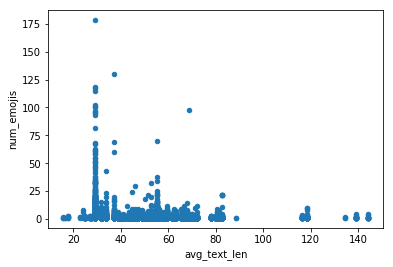

In [524]:
emoji_com.plot.scatter(x='avg_text_len', y='num_emojis', grid=False)

(-50, 1500)

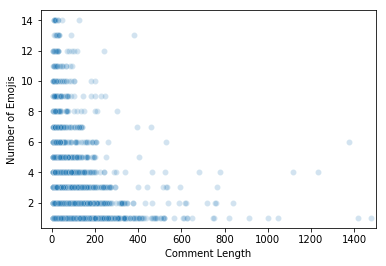

In [980]:
emoji_com['com_len'] = emoji_com['comments'].apply(len)
fig = sns.scatterplot(x='com_len', y='num_emojis', data=emoji_com, alpha=0.2)
fig.set_xlabel('Comment Length')
fig.set_ylabel('Number of Emojis')
fig.set_xlim((-50,1500))

In [536]:
emoji_com.sort_values(by='num_emojis', ascending=False).head()

,index,channel_id,videos,merged_comments,comments,tot_likes,tot_dislikes,tot_text_len,avg_likes,avg_dislikes,tot_comments,avg_text_len,emojis,num_emojis,com_len
19466,0,UCH8NnRkxQg1zX7mHFRPq73g,2k-DWXKrIVg,🇮🇱🇮🇱🇮🇱🇮🇱🇮🇱🇮🇱كولش حلوすごممكن قلب ❤🤲🤲🤲🤲🤲🤲بليزحرفي...,🅰🅾❄❄❄❄✉☺❤✌☝,23472,0,261763,2.620813,0.0,8956.0,29.227669,"[🎇, 🍙, 🌲, 🍠, 🎨, 🌴, 👒, 💞, ⛺, 🍦, 🍡, 👰, 🔮, 💶, 😙, ...",178,11
39570,0,UCH8NnRkxQg1zX7mHFRPq73g,8B_hEw22Cn8,I like peppermint but when you put it with cho...,️️️️️️🇬🇯🇪🇯🇵🇿,1707,0,24501,2.582451,0.0,661.0,37.066566,"[😬, ⭐, 🇦🇫, 🇲🇹, 🇧🇴, 🇶🇦, 🇻🇺, 🇲🇾, 🇦🇹, 🤠, 🇲🇿, 🇦🇷, ...",130,12
17120,0,UCH8NnRkxQg1zX7mHFRPq73g,2k-DWXKrIVg,🇮🇱🇮🇱🇮🇱🇮🇱🇮🇱🇮🇱كولش حلوすごممكن قلب ❤🤲🤲🤲🤲🤲🤲بليزحرفي...,☺❤❤✌☝,23472,0,261763,2.620813,0.0,8956.0,29.227669,"[🙀, 😬, 🙈, 💞, 👰, 👫, ✊, 😙, 🙇, 👨, 😌, 😴, 😾, 👩, 💗, ...",118,5
31883,0,UCH8NnRkxQg1zX7mHFRPq73g,A40MXgniQE0,"Great sharing my friend, visit my house to pla...",فرزدق فريق عمل 🕯✉🖌✏🖊🖊✏🖋✒🖍🗳🖇🗓⚒🗄⚒⚒⚗⚙🗜🛢⚰🛢⚱⚖🏛🏚🏙🏗🏘🏗...,24504,0,263123,2.710619,0.0,9040.0,29.106527,"[📅, ⭐, 💧, ⛺, 🏩, 🌀, 💶, 🌉, 🏭, 📓, ⏰, ⚡, ⛄, ✂️, 📂,...",117,79
32671,0,UCH8NnRkxQg1zX7mHFRPq73g,A40MXgniQE0,"Great sharing my friend, visit my house to pla...",Tiu🛍🕨🕩🕪🕭♩🎙🎚🎛☎☏🖥🖨⌨🖱🖲📽🕯🗞✉🗜🗳✏🖋🖊🖌🖍🗂🗒🗓✂🗃🗄🗑🗝🛠⛏🗡🛡🛢⚗,24504,0,263123,2.710619,0.0,9040.0,29.106527,"[📅, 🔮, 🎸, 💶, 😙, 🔑, 📥, 📓, 💽, 📯, 🔔, 📹, 📀, 📑, 📠, ...",115,44


Text(0, 0.5, 'Number of Emojis')

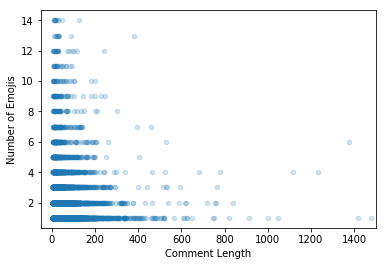

In [592]:
#remove too many emojis
emoji_com = emoji_com.loc[emoji_com['num_emojis'] < 15]
emoji_com = emoji_com.loc[emoji_com['com_len'] > 5]
fig = emoji_com.plot.scatter(x='com_len', y='num_emojis', grid=False, xlim=(-50,1500), alpha=0.2)
fig.set_xlabel('Comment Length')
fig.set_ylabel('Number of Emojis')

In [593]:
emoji_com.shape

(12400, 15)

In [594]:
# thank you MaxU, https://stackoverflow.com/a/48532692/4909087
emoji_com2 = pd.DataFrame({
      col:np.repeat(emoji_com[col].values, emoji_com['emojis'].str.len())
      for col in emoji_com.columns.drop('emojis')}
    ).assign(**{'emojis':np.concatenate(emoji_com['emojis'].values)})[emoji_com.columns]
emoji_com2.head()




,index,channel_id,videos,merged_comments,comments,tot_likes,tot_dislikes,tot_text_len,avg_likes,avg_dislikes,tot_comments,avg_text_len,emojis,num_emojis,com_len
0,0,UCVVAnxQ2YMC_qlc7QfPA2YQ,50cMrTA26tw,I just ate and this video makes me hungryThat ...,Your channel is f***ing amazing Keep going,940,0,31223,2.15103,0.0,437.0,71.448513,😃,3,44
1,0,UCVVAnxQ2YMC_qlc7QfPA2YQ,50cMrTA26tw,I just ate and this video makes me hungryThat ...,Your channel is f***ing amazing Keep going,940,0,31223,2.15103,0.0,437.0,71.448513,👍,3,44
2,0,UCVVAnxQ2YMC_qlc7QfPA2YQ,50cMrTA26tw,I just ate and this video makes me hungryThat ...,Your channel is f***ing amazing Keep going,940,0,31223,2.15103,0.0,437.0,71.448513,😏,3,44
3,0,UCVVAnxQ2YMC_qlc7QfPA2YQ,50cMrTA26tw,I just ate and this video makes me hungryThat ...,\nI would love to be a fly In that kitchen.,940,0,31223,2.15103,0.0,437.0,71.448513,❌,1,42
4,0,UCVVAnxQ2YMC_qlc7QfPA2YQ,50cMrTA26tw,I just ate and this video makes me hungryThat ...,Kinda want a set of those awesome knives,940,0,31223,2.15103,0.0,437.0,71.448513,🔪,1,41


In [595]:
emoji_com2.shape

(21640, 15)

In [596]:
emoji_com_sub = emoji_com2.sample(100)

In [597]:
emoji_com_sub.head()

,index,channel_id,videos,merged_comments,comments,tot_likes,tot_dislikes,tot_text_len,avg_likes,avg_dislikes,tot_comments,avg_text_len,emojis,num_emojis,com_len
16680,0,UC1of9ELYwB623fWaAMRDVFA,-WvX5Bj9liE,You are a amazing person who deserves to be kn...,You are very khind i hope you always healty,43428,0,526226,4.561286,0.0,9521.0,55.270035,❣️,2,43
11235,0,UCH8NnRkxQg1zX7mHFRPq73g,A40MXgniQE0,"Great sharing my friend, visit my house to pla...",So yummy !!!!!,24504,0,263123,2.710619,0.0,9040.0,29.106527,😍,1,14
9762,0,UCH8NnRkxQg1zX7mHFRPq73g,A40MXgniQE0,"Great sharing my friend, visit my house to pla...",Esto se ve especial mente delicioso,24504,0,263123,2.710619,0.0,9040.0,29.106527,👌,1,35
20467,0,UCH8NnRkxQg1zX7mHFRPq73g,9Q9rcq4cB64,I just realized that the balloon thing you can...,It is very and So yummy!❤,1882,0,17957,3.336879,0.0,564.0,31.838652,👌,3,25
9588,0,UCH8NnRkxQg1zX7mHFRPq73g,A40MXgniQE0,"Great sharing my friend, visit my house to pla...",Uma delícia,24504,0,263123,2.710619,0.0,9040.0,29.106527,😍,1,12


In [598]:
emoji_com_sub['emojis'].unique()

array(['❣️', '😍', '👌', '🍰', '😎', '😁', '❤️', '🍗', '🎅', '😅', '👨', '😘', '😚',
       '🙏', '👏', '💗', '🙌', '🤦', '😋', '👍', '😀', '😃', '😊', '😵',
       '\U0001f929', '🤷', '😩', '♥️', '😂', '💕', '💐', '😉', '💩', '🎊', '🥂',
       '🐒', '💓', '🍧', '😙', '😢', '🍪', '😇', '🤣', '♂️', '🎂', '\U0001f92e',
       '💛', '😮', '💯', '♀️', '🌷', '🎆', '😥', '😭', '💘', '🐛', '😖'],
      dtype=object)

In [599]:
import emojis
emojidict = pd.DataFrame.from_dict(, orient='index')
emojidict

SyntaxError: invalid syntax (<ipython-input-599-4f66e6e4082d>, line 2)

In [545]:
emojidict.to_csv('emojis.csv')

NameError: name 'emojidict' is not defined

In [12]:
emojilist = {e.aliases[0]: e.emoji for e in emojis.db.get_emojis_by_category('Smileys & Emotion')}
emojidf = pd.DataFrame.from_dict(emojilist, orient='index')
emojidf['category'] = ''


NameError: name 'emojis' is not defined

In [13]:
emojidf.to_csv('emojis.csv')

NameError: name 'emojidf' is not defined

In [3]:
import pandas as pd
emojidf = pd.read_csv('emojis.csv', index_col=0)
emojidf.tail(20)

,0,category
disappointed,😞,upset
sweat,😓,upset
weary,😩,upset
tired_face,😫,upset
yawning_face,🥱,boring
triumph,😤,upset
rage,😡,upset
angry,😠,upset
cursing_face,🤬,upset
sparkling_heart,💖,calm


In [601]:
emojidf.columns = ['emojis', 'category']
emojidf.head()

,emojis,category
grinning,😀,excited
smiley,😃,excited
smile,😄,excited
grin,😁,excited
laughing,😆,funny


In [634]:
emojidf = emojidf.replace(to_replace='boring', value='upset')
emojidf = emojidf.replace(to_replace='disgust', value='upset')

In [635]:
emoji_com_sub = emoji_com2[emoji_com2['emojis'].isin(emojidf['emojis'].values)]
emoji_com_sub = emoji_com_sub[emoji_com_sub['comments'] != '']
emoji_com_sub.head()

,index,channel_id,videos,merged_comments,comments,tot_likes,tot_dislikes,tot_text_len,avg_likes,avg_dislikes,tot_comments,avg_text_len,emojis,num_emojis,com_len
0,0,UCVVAnxQ2YMC_qlc7QfPA2YQ,50cMrTA26tw,I just ate and this video makes me hungryThat ...,Your channel is f***ing amazing Keep going,940,0,31223,2.15103,0.0,437.0,71.448513,😃,3,44
6,0,UCVVAnxQ2YMC_qlc7QfPA2YQ,50cMrTA26tw,I just ate and this video makes me hungryThat ...,I Want like this Knife,940,0,31223,2.15103,0.0,437.0,71.448513,😠,1,23
7,0,UCVVAnxQ2YMC_qlc7QfPA2YQ,50cMrTA26tw,I just ate and this video makes me hungryThat ...,Jealous,940,0,31223,2.15103,0.0,437.0,71.448513,🤤,1,8
12,0,UCVVAnxQ2YMC_qlc7QfPA2YQ,50cMrTA26tw,I just ate and this video makes me hungryThat ...,Omg a new delicious food;you are the best guys!,940,0,31223,2.15103,0.0,437.0,71.448513,😚,1,48
17,0,UCVVAnxQ2YMC_qlc7QfPA2YQ,50cMrTA26tw,I just ate and this video makes me hungryThat ...,JC1028 . Typing away are we thinking I need to...,940,0,31223,2.15103,0.0,437.0,71.448513,🤔,1,90


In [636]:

emoji_com_sub2 = emoji_com_sub.merge(emojidf, on='emojis')
emoji_com_sub2 = emoji_com_sub2.drop('index', 1)

emoji_com_sub2.shape

(11854, 15)

In [709]:
emojitraining = emoji_com_sub2#.sample(11000)
emojitraining[['comments', 'videos', 'category']]
emojitraining.dropna(inplace=True)
emojitraining.head()

,channel_id,videos,merged_comments,comments,tot_likes,tot_dislikes,tot_text_len,avg_likes,avg_dislikes,tot_comments,avg_text_len,emojis,num_emojis,com_len,category,comment_tokens,comment_lemmats,comment_clean,lem_length
0,UCVVAnxQ2YMC_qlc7QfPA2YQ,50cMrTA26tw,I just ate and this video makes me hungryThat ...,your channel is fing amazing keep going,940,0,31223,2.151030,0.0,437.0,71.448513,😃,3,44,excited,"[channel, amazing, keep, going]","[channel, amazing, keep, going]",channel amazing keep going,4
1,UCVVAnxQ2YMC_qlc7QfPA2YQ,50cMrTA26tw,I just ate and this video makes me hungryThat ...,jc lol thats because we would be doing this s...,940,0,31223,2.151030,0.0,437.0,71.448513,😃,1,82,excited,"[thats, would, stuff, instead, watching]","[thats, would, stuff, instead, watching]",thats would stuff instead watching,5
2,UCVVAnxQ2YMC_qlc7QfPA2YQ,50cMrTA26tw,I just ate and this video makes me hungryThat ...,i want to come play outside enjoy the sun wate...,940,0,31223,2.151030,0.0,437.0,71.448513,😃,10,198,excited,"[want, come, play, outside, enjoy, sun, water,...","[want, come, play, outside, enjoy, sun, water,...",want come play outside enjoy sun water view co...,18
3,UCwbXPUMNQwUGCG_nCkAq3uA,-DZxqe-tDtg,This actually looks really good.:(うぇーきもrustic ...,para que fumigar que coraje divina,27721,0,358727,4.232214,0.0,6550.0,54.767481,😃,4,34,excited,[para],[para],para,1
4,UCwbXPUMNQwUGCG_nCkAq3uA,-DZxqe-tDtg,This actually looks really good.:(うぇーきもrustic ...,jajajaja tal cual,27721,0,358727,4.232214,0.0,6550.0,54.767481,😃,4,17,excited,[tal],[tal],tal,1


## Initial NLP methods

Running the data through some methods: TF-IDF, gensim.

In [6]:
# https://towardsdatascience.com/multi-class-text-classification-with-doc2vec-logistic-regression-9da9947b43f4

import pandas as pd
import numpy as np
from tqdm import tqdm
from gensim.models import Doc2Vec
from sklearn import utils
from sklearn.model_selection import train_test_split
import gensim
from sklearn.linear_model import LogisticRegression
from gensim.models.doc2vec import TaggedDocument
import re
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords

In [7]:
en_stops = set(stopwords.words('english'), ['buzzfeed'])
en_words = set(nltk.corpus.words.words())

TypeError: set expected at most 1 arguments, got 2

In [712]:
bool(set(emojitraining.iloc[3,:].comments.split()) & set(en_stops) or set(emojitraining.iloc[3,:].comments.split()) & set(en_words))

True

In [713]:
from nltk.tokenize import WhitespaceTokenizer
ws_tokenizer = WhitespaceTokenizer()
ws_tokenizer.tokenize(emojitraining.iloc[34,:].comments)

def clean_comments(text):
    text = re.sub(r'[?|!|\'|"|#]',r'',text)
    text = re.sub(r'[.|,|)|(|\|/]',r' ',text)
    text = text.replace("@","").replace("&","").replace(":","").replace("\"","").replace("/","").replace("''","")
    text = text.replace("â€œ","").replace("â€˜","").replace("*","").replace("’","").replace("\n","").replace("$","")
    text = text.lower()
    
    if not bool(set(text.split()) & set(en_stops) or set(text.split()) & set(en_words)):
        return None
    
    new_text = ""
    for word in text.split():
        tmp_word = re.sub('[^a-z A-Z]+', ' ', word)
        new_text += tmp_word + " "
    new_text = new_text.strip()

    return new_text

def tokenize_text(text):
    tokens = []
    for word in nltk.word_tokenize(text):
        if len(word) < 2 or word in en_stops or word not in en_words:
            continue
        tokens.append(word.lower())
    return tokens

emojitraining['comments'] = emojitraining['comments'].apply(clean_comments)
emojitraining.head()


,channel_id,videos,merged_comments,comments,tot_likes,tot_dislikes,tot_text_len,avg_likes,avg_dislikes,tot_comments,avg_text_len,emojis,num_emojis,com_len,category,comment_tokens,comment_lemmats,comment_clean,lem_length
0,UCVVAnxQ2YMC_qlc7QfPA2YQ,50cMrTA26tw,I just ate and this video makes me hungryThat ...,your channel is fing amazing keep going,940,0,31223,2.151030,0.0,437.0,71.448513,😃,3,44,excited,"[channel, amazing, keep, going]","[channel, amazing, keep, going]",channel amazing keep going,4
1,UCVVAnxQ2YMC_qlc7QfPA2YQ,50cMrTA26tw,I just ate and this video makes me hungryThat ...,jc lol thats because we would be doing this st...,940,0,31223,2.151030,0.0,437.0,71.448513,😃,1,82,excited,"[thats, would, stuff, instead, watching]","[thats, would, stuff, instead, watching]",thats would stuff instead watching,5
2,UCVVAnxQ2YMC_qlc7QfPA2YQ,50cMrTA26tw,I just ate and this video makes me hungryThat ...,i want to come play outside enjoy the sun wate...,940,0,31223,2.151030,0.0,437.0,71.448513,😃,10,198,excited,"[want, come, play, outside, enjoy, sun, water,...","[want, come, play, outside, enjoy, sun, water,...",want come play outside enjoy sun water view co...,18
3,UCwbXPUMNQwUGCG_nCkAq3uA,-DZxqe-tDtg,This actually looks really good.:(うぇーきもrustic ...,para que fumigar que coraje divina,27721,0,358727,4.232214,0.0,6550.0,54.767481,😃,4,34,excited,[para],[para],para,1
4,UCwbXPUMNQwUGCG_nCkAq3uA,-DZxqe-tDtg,This actually looks really good.:(うぇーきもrustic ...,jajajaja tal cual,27721,0,358727,4.232214,0.0,6550.0,54.767481,😃,4,17,excited,[tal],[tal],tal,1


In [714]:
emojitraining.dropna(inplace=True)
emojitraining.head()
emojitraining.shape

(9855, 19)

In [715]:
emojitraining['comment_tokens'] = emojitraining['comments'].apply(tokenize_text)

In [716]:
emojitraining.head()

,channel_id,videos,merged_comments,comments,tot_likes,tot_dislikes,tot_text_len,avg_likes,avg_dislikes,tot_comments,avg_text_len,emojis,num_emojis,com_len,category,comment_tokens,comment_lemmats,comment_clean,lem_length
0,UCVVAnxQ2YMC_qlc7QfPA2YQ,50cMrTA26tw,I just ate and this video makes me hungryThat ...,your channel is fing amazing keep going,940,0,31223,2.151030,0.0,437.0,71.448513,😃,3,44,excited,"[channel, amazing, keep, going]","[channel, amazing, keep, going]",channel amazing keep going,4
1,UCVVAnxQ2YMC_qlc7QfPA2YQ,50cMrTA26tw,I just ate and this video makes me hungryThat ...,jc lol thats because we would be doing this st...,940,0,31223,2.151030,0.0,437.0,71.448513,😃,1,82,excited,"[thats, would, stuff, instead, watching]","[thats, would, stuff, instead, watching]",thats would stuff instead watching,5
2,UCVVAnxQ2YMC_qlc7QfPA2YQ,50cMrTA26tw,I just ate and this video makes me hungryThat ...,i want to come play outside enjoy the sun wate...,940,0,31223,2.151030,0.0,437.0,71.448513,😃,10,198,excited,"[want, come, play, outside, enjoy, sun, water,...","[want, come, play, outside, enjoy, sun, water,...",want come play outside enjoy sun water view co...,18
3,UCwbXPUMNQwUGCG_nCkAq3uA,-DZxqe-tDtg,This actually looks really good.:(うぇーきもrustic ...,para que fumigar que coraje divina,27721,0,358727,4.232214,0.0,6550.0,54.767481,😃,4,34,excited,[para],[para],para,1
4,UCwbXPUMNQwUGCG_nCkAq3uA,-DZxqe-tDtg,This actually looks really good.:(うぇーきもrustic ...,jajajaja tal cual,27721,0,358727,4.232214,0.0,6550.0,54.767481,😃,4,17,excited,[tal],[tal],tal,1


In [717]:
# https://towardsdatascience.com/multi-class-text-classification-with-doc2vec-logistic-regression-9da9947b43f4
train, test = train_test_split(emojitraining, test_size=0.3, random_state=42)

train_tagged = train.apply(
    lambda r: TaggedDocument(words=emojitraining['comment_tokens'], tags=[emojitraining.category]), axis=1)
test_tagged = test.apply(
    lambda r: TaggedDocument(words=emojitraining['comment_tokens'], tags=[emojitraining.category]), axis=1)

In [718]:
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.lancaster import LancasterStemmer

porter = PorterStemmer()
snowball = SnowballStemmer('english')
lancaster = LancasterStemmer()

In [719]:
porter.stem('building')

'build'

In [720]:
from nltk.stem.wordnet import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

def lemmat_list(words):
    new_words = []
    for word in words:
        new_words.append(lemmatizer.lemmatize(word))
    return new_words
                         
emojitraining['comment_lemmats'] = emojitraining['comment_tokens'].apply(lemmat_list)

In [721]:
emojitraining.head()

,channel_id,videos,merged_comments,comments,tot_likes,tot_dislikes,tot_text_len,avg_likes,avg_dislikes,tot_comments,avg_text_len,emojis,num_emojis,com_len,category,comment_tokens,comment_lemmats,comment_clean,lem_length
0,UCVVAnxQ2YMC_qlc7QfPA2YQ,50cMrTA26tw,I just ate and this video makes me hungryThat ...,your channel is fing amazing keep going,940,0,31223,2.151030,0.0,437.0,71.448513,😃,3,44,excited,"[channel, amazing, keep, going]","[channel, amazing, keep, going]",channel amazing keep going,4
1,UCVVAnxQ2YMC_qlc7QfPA2YQ,50cMrTA26tw,I just ate and this video makes me hungryThat ...,jc lol thats because we would be doing this st...,940,0,31223,2.151030,0.0,437.0,71.448513,😃,1,82,excited,"[thats, would, stuff, instead, watching]","[thats, would, stuff, instead, watching]",thats would stuff instead watching,5
2,UCVVAnxQ2YMC_qlc7QfPA2YQ,50cMrTA26tw,I just ate and this video makes me hungryThat ...,i want to come play outside enjoy the sun wate...,940,0,31223,2.151030,0.0,437.0,71.448513,😃,10,198,excited,"[want, come, play, outside, enjoy, sun, water,...","[want, come, play, outside, enjoy, sun, water,...",want come play outside enjoy sun water view co...,18
3,UCwbXPUMNQwUGCG_nCkAq3uA,-DZxqe-tDtg,This actually looks really good.:(うぇーきもrustic ...,para que fumigar que coraje divina,27721,0,358727,4.232214,0.0,6550.0,54.767481,😃,4,34,excited,[para],[para],para,1
4,UCwbXPUMNQwUGCG_nCkAq3uA,-DZxqe-tDtg,This actually looks really good.:(うぇーきもrustic ...,jajajaja tal cual,27721,0,358727,4.232214,0.0,6550.0,54.767481,😃,4,17,excited,[tal],[tal],tal,1


In [722]:
emojitraining['lem_length'] = emojitraining['comment_lemmats'].apply(len)
emojitraining = emojitraining.loc[emojitraining['lem_length'] > 2]
emojitraining.shape

(5346, 19)

In [723]:
emojitraining['comment_clean'] = emojitraining['comment_lemmats'].apply(' '.join)
emojitraining.head()

/Users/kristenbrown/miniconda3/envs/insight/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,channel_id,videos,merged_comments,comments,tot_likes,tot_dislikes,tot_text_len,avg_likes,avg_dislikes,tot_comments,avg_text_len,emojis,num_emojis,com_len,category,comment_tokens,comment_lemmats,comment_clean,lem_length
0,UCVVAnxQ2YMC_qlc7QfPA2YQ,50cMrTA26tw,I just ate and this video makes me hungryThat ...,your channel is fing amazing keep going,940,0,31223,2.151030,0.0,437.0,71.448513,😃,3,44,excited,"[channel, amazing, keep, going]","[channel, amazing, keep, going]",channel amazing keep going,4
1,UCVVAnxQ2YMC_qlc7QfPA2YQ,50cMrTA26tw,I just ate and this video makes me hungryThat ...,jc lol thats because we would be doing this st...,940,0,31223,2.151030,0.0,437.0,71.448513,😃,1,82,excited,"[thats, would, stuff, instead, watching]","[thats, would, stuff, instead, watching]",thats would stuff instead watching,5
2,UCVVAnxQ2YMC_qlc7QfPA2YQ,50cMrTA26tw,I just ate and this video makes me hungryThat ...,i want to come play outside enjoy the sun wate...,940,0,31223,2.151030,0.0,437.0,71.448513,😃,10,198,excited,"[want, come, play, outside, enjoy, sun, water,...","[want, come, play, outside, enjoy, sun, water,...",want come play outside enjoy sun water view co...,18
5,UCwbXPUMNQwUGCG_nCkAq3uA,-DZxqe-tDtg,This actually looks really good.:(うぇーきもrustic ...,i bet she doesnt even eat that chickens,27721,0,358727,4.232214,0.0,6550.0,54.767481,😃,1,41,excited,"[bet, doesnt, even, eat]","[bet, doesnt, even, eat]",bet doesnt even eat,4
7,UCwbXPUMNQwUGCG_nCkAq3uA,-DZxqe-tDtg,This actually looks really good.:(うぇーきもrustic ...,peanut butter ha ha ha ha ha,27721,0,358727,4.232214,0.0,6550.0,54.767481,😃,1,29,excited,"[peanut, butter, ha, ha, ha, ha, ha]","[peanut, butter, ha, ha, ha, ha, ha]",peanut butter ha ha ha ha ha,7


In [967]:
channel_stats = comments.drop_duplicates('videos')
channel_stats.head()

,index,channel_id,videos,merged_comments,comments,tot_likes,tot_dislikes,tot_text_len,avg_likes,avg_dislikes,tot_comments,avg_text_len,emojis,num_emojis
0,0,UCVVAnxQ2YMC_qlc7QfPA2YQ,50cMrTA26tw,I just ate and this video makes me hungryThat ...,I just ate and this video makes me hungry,940,0,31223,2.151030,0.0,437.0,71.448513,[],0
437,0,UCJFp8uSYCjXOMnkUyb3CQ3Q,ALgD_Rg7xVA,The thumbnail is too cuteYou’re supposed to ke...,The thumbnail is too cute,7392,0,27786,14.133843,0.0,523.0,53.128107,[],0
960,0,UCJFp8uSYCjXOMnkUyb3CQ3Q,6aYGAPv2sFs,2:07I was expecting a bunch of different kinds...,2:07,1948,0,31498,4.821782,0.0,404.0,77.965347,[],0
1364,0,UCWP5zYusIJqJCK27A0NlAKg,5FNY9qMOpdY,Jeff. The absolutely BEST stuffiing in the wo...,Jeff. The absolutely BEST stuffiing in the wo...,462,0,31473,2.044248,0.0,226.0,139.261062,[],0
1590,0,UCKnRNV6x7s-ZSDfYPATq7cQ,-5f5TAyseCE,dekhne m acha n lag raha h to khane me kaise a...,dekhne m acha n lag raha h to khane me kaise a...,20,0,947,1.000000,0.0,20.0,47.350000,[],0


In [970]:
channel_stats2 = channel_stats.groupby(['channel_id']).size().reset_index(name='count')

Text(0, 0.5, 'Channels')

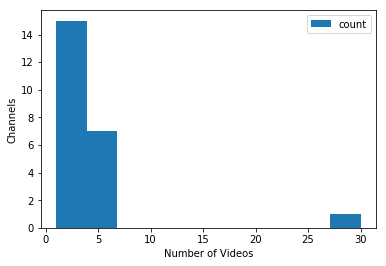

In [983]:
fig = channel_stats2.plot.hist()
fig.set_xlabel("Number of Videos")
fig.set_ylabel("Channels")

Text(0, 0.5, 'Videos')

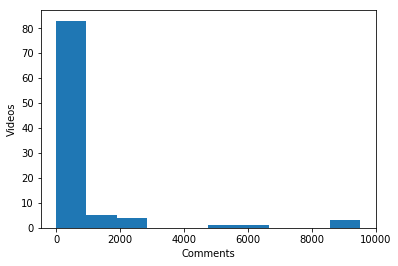

In [975]:
fig = channel_stats['tot_comments'].plot.hist()
fig.set_xlabel("Comments")
fig.set_ylabel("Videos")

## tf-idf

In [724]:
# vectorize the articles and compute count matrix
from sklearn.feature_extraction.text import TfidfVectorizer
tf_vectorizer = TfidfVectorizer(max_features = 1000, ngram_range=(1,3))
tfidf_matrix = tf_vectorizer.fit_transform(emojitraining['comment_clean'])

In [725]:
calm = emojitraining.loc[emojitraining['category']=='calm']
excited = emojitraining.loc[emojitraining['category']=='excited']
funny = emojitraining.loc[emojitraining['category']=='funny']
cool = emojitraining.loc[emojitraining['category']=='cool']
#boring = emojitraining.loc[emojitraining['category']=='boring']
upset = emojitraining.loc[emojitraining['category']=='upset']
#disgust = emojitraining.loc[emojitraining['category']=='disgust']
interesting = emojitraining.loc[emojitraining['category']=='interesting']

In [726]:
excited.head()

,channel_id,videos,merged_comments,comments,tot_likes,tot_dislikes,tot_text_len,avg_likes,avg_dislikes,tot_comments,avg_text_len,emojis,num_emojis,com_len,category,comment_tokens,comment_lemmats,comment_clean,lem_length
0,UCVVAnxQ2YMC_qlc7QfPA2YQ,50cMrTA26tw,I just ate and this video makes me hungryThat ...,your channel is fing amazing keep going,940,0,31223,2.151030,0.0,437.0,71.448513,😃,3,44,excited,"[channel, amazing, keep, going]","[channel, amazing, keep, going]",channel amazing keep going,4
1,UCVVAnxQ2YMC_qlc7QfPA2YQ,50cMrTA26tw,I just ate and this video makes me hungryThat ...,jc lol thats because we would be doing this st...,940,0,31223,2.151030,0.0,437.0,71.448513,😃,1,82,excited,"[thats, would, stuff, instead, watching]","[thats, would, stuff, instead, watching]",thats would stuff instead watching,5
2,UCVVAnxQ2YMC_qlc7QfPA2YQ,50cMrTA26tw,I just ate and this video makes me hungryThat ...,i want to come play outside enjoy the sun wate...,940,0,31223,2.151030,0.0,437.0,71.448513,😃,10,198,excited,"[want, come, play, outside, enjoy, sun, water,...","[want, come, play, outside, enjoy, sun, water,...",want come play outside enjoy sun water view co...,18
5,UCwbXPUMNQwUGCG_nCkAq3uA,-DZxqe-tDtg,This actually looks really good.:(うぇーきもrustic ...,i bet she doesnt even eat that chickens,27721,0,358727,4.232214,0.0,6550.0,54.767481,😃,1,41,excited,"[bet, doesnt, even, eat]","[bet, doesnt, even, eat]",bet doesnt even eat,4
7,UCwbXPUMNQwUGCG_nCkAq3uA,-DZxqe-tDtg,This actually looks really good.:(うぇーきもrustic ...,peanut butter ha ha ha ha ha,27721,0,358727,4.232214,0.0,6550.0,54.767481,😃,1,29,excited,"[peanut, butter, ha, ha, ha, ha, ha]","[peanut, butter, ha, ha, ha, ha, ha]",peanut butter ha ha ha ha ha,7


In [832]:
majoremojis = pd.concat([upset.sample(700),calm.sample(700), funny.sample(700)], axis=0)
majoremojis.tail()

,channel_id,videos,merged_comments,comments,tot_likes,tot_dislikes,tot_text_len,avg_likes,avg_dislikes,tot_comments,avg_text_len,emojis,num_emojis,com_len,category,comment_tokens,comment_lemmats,comment_clean,lem_length
2141,UCJFp8uSYCjXOMnkUyb3CQ3Q,5gicCz8pLxM,Catchy musicOnly 90s kids would remember.........,kourtney the army i was born in the early s an...,22802,0,182190,10.111752,0.0,2255.0,80.793792,😂,1,117,funny,"[army, born, early, stuff, always, known, dirt...","[army, born, early, stuff, always, known, dirt...",army born early stuff always known dirt though,8
1030,UCJFp8uSYCjXOMnkUyb3CQ3Q,5I0Eit1wD34,No it's not from sun comes up to sun comes dow...,who else thought this was uploaded today,62166,0,349746,11.685338,0.0,5320.0,65.741729,😂,1,41,funny,"[else, thought, today]","[else, thought, today]",else thought today,3
938,UCwbXPUMNQwUGCG_nCkAq3uA,-DZxqe-tDtg,This actually looks really good.:(うぇーきもrustic ...,crazy peopla only do this yuks why wont you ea...,27721,0,358727,4.232214,0.0,6550.0,54.767481,😂,1,61,funny,"[crazy, wont, eat, cement, next]","[crazy, wont, eat, cement, next]",crazy wont eat cement next,5
1050,UCJFp8uSYCjXOMnkUyb3CQ3Q,5I0Eit1wD34,No it's not from sun comes up to sun comes dow...,hamza arshad oh its nothing personal its just ...,62166,0,349746,11.685338,0.0,5320.0,65.741729,😂,1,464,funny,"[hamza, oh, nothing, personal, lost, interest,...","[hamza, oh, nothing, personal, lost, interest,...",hamza oh nothing personal lost interest religi...,34
785,UCwbXPUMNQwUGCG_nCkAq3uA,-DZxqe-tDtg,This actually looks really good.:(うぇーきもrustic ...,se los aseguro si esa chica le aparece un le n...,27721,0,358727,4.232214,0.0,6550.0,54.767481,😂,2,78,funny,"[se, si, un, es, de, lo, comer]","[se, si, un, e, de, lo, comer]",se si un e de lo comer,7


In [833]:
finalemoji3 = majoremojis[majoremojis['comments'] != ''][['videos','comment_clean']]
finalemoji3 = pd.concat([finalemoji3, pd.get_dummies(majoremojis['category'])], axis=1)
finalemoji3.head()

,videos,comment_clean,calm,funny,upset
8067,8_zM9IafC7A,didnt put right amount flour top left corner,0,0,1
8450,5I0Eit1wD34,haikal take havent seen end,0,0,1
195,2k-DWXKrIVg,also put video,0,0,1
4363,5k9JkEf9-MU,three dang like walter yesterday grow fast,0,0,1
9713,-DZxqe-tDtg,love channel imagine smell,0,0,1


In [834]:
tfidf_matrix = tf_vectorizer.fit_transform(calm['comment_clean'])
print(tfidf_matrix[1])

  (0, 927)	0.6557330333798372
  (0, 903)	0.497270844478307
  (0, 238)	0.5680984916071409


In [835]:
finalemoji = emojitraining[emojitraining['comments'] != ''][['videos','comment_clean']]
finalemoji = pd.concat([finalemoji, pd.get_dummies(emojitraining['category'])], axis=1)

In [836]:
finalemoji.head()

,videos,comment_clean,calm,cool,excited,funny,interesting,upset
0,50cMrTA26tw,channel amazing keep going,0,0,1,0,0,0
1,50cMrTA26tw,thats would stuff instead watching,0,0,1,0,0,0
2,50cMrTA26tw,want come play outside enjoy sun water view co...,0,0,1,0,0,0
5,-DZxqe-tDtg,bet doesnt even eat,0,0,1,0,0,0
7,-DZxqe-tDtg,peanut butter ha ha ha ha ha,0,0,1,0,0,0


In [837]:
finalemoji_stats = finalemoji[['calm', 'cool', 'excited', 'funny', 'interesting', 'upset']].apply(sum, axis=0)
finalemoji_stats



calm           1905
cool            116
excited        1313
funny          1137
interesting      93
upset           782
dtype: int64

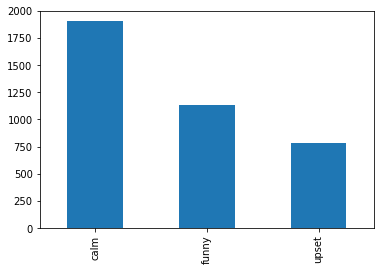

In [838]:
fig = finalemoji_stats[['calm', 'funny', 'upset']].plot.bar()

In [846]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.pipeline import Pipeline

train, test = train_test_split(finalemoji, random_state=42, test_size=0.33, shuffle=True)
X_train = tf_vectorizer.fit_transform(train['comment_clean'])
ytrain = train.drop(labels=['videos', 'comment_clean'], axis=1)
X_test = tf_vectorizer.fit_transform(test['comment_clean'])
ytest = test.drop(labels=['videos', 'comment_clean'], axis=1)

categories = list(emojitraining['category'].unique())
categories_low = ['boring','cool', 'disgust', 'interesting' , 'upset']
categories_high = ['upset', 'funny', 'calm']

In [847]:
NB_pipeline = Pipeline([
                ('clf', OneVsRestClassifier(MultinomialNB(
                    fit_prior=True, class_prior=None))),
            ])

for category in categories_high:
    print('... Processing {}'.format(category))
    # train the model using X_dtm & y
    NB_pipeline.fit(X_train, ytrain[category])
    # compute the testing accuracy
    prediction = NB_pipeline.predict(X_test)
    print('Test accuracy is {}'.format(accuracy_score(ytest[category], prediction)))

... Processing upset
Test accuracy is 0.8396600566572238
... Processing funny
Test accuracy is 0.7529745042492918
... Processing calm
Test accuracy is 0.6419263456090651


In [848]:
NB_pipeline = Pipeline([
                ('clf', OneVsRestClassifier(LogisticRegression(solver='sag'))),
            ])

for category in categories_high:
    print('... Processing {}'.format(category))
    # train the model using X_dtm & y
    NB_pipeline.fit(X_train, ytrain[category])
    # compute the testing accuracy
    prediction = NB_pipeline.predict(X_test)
    print('Test accuracy is {}'.format(accuracy_score(ytest[category], prediction)))

... Processing upset
Test accuracy is 0.8509915014164305
... Processing funny
Test accuracy is 0.7711048158640227
... Processing calm
Test accuracy is 0.6447592067988669


In [849]:
# train on just the 3 classes
#finaldata = tf_vectorizer.fit_transform(finalemoji3['comment_clean'])
train, test = train_test_split(finalemoji3, random_state=42, test_size=0.33, shuffle=True)
X_train = train['comment_clean']
ytrain = train.drop(labels=['videos', 'comment_clean'], axis=1)
X_test = test['comment_clean']
ytest = test.drop(labels=['videos', 'comment_clean'], axis=1)

categories = list(emojitraining['category'].unique())
NB_pipeline = Pipeline([('tfidf', TfidfVectorizer(max_features = 1000, ngram_range=(1,3))),
                ('clf', OneVsRestClassifier(LogisticRegression(solver='sag'))),
            ])

# train the model using X_dtm & y
NB_pipeline.fit(X_train, ytrain[categories_high])
# compute the testing accuracy
prediction = NB_pipeline.predict(X_test)
print('Test accuracy is {}'.format(accuracy_score(ytest[categories_high], prediction)))

Test accuracy is 0.3059163059163059


In [850]:
NB_pipeline = Pipeline([('tfidf', TfidfVectorizer(max_features = 1000, ngram_range=(1,3))),
                ('clf', OneVsRestClassifier(MultinomialNB(
                    fit_prior=True, class_prior=None))),
            ])

# train the model using X_dtm & y
NB_pipeline.fit(X_train, ytrain[categories_high])
# compute the testing accuracy
prediction = NB_pipeline.predict(X_test)
print('Test accuracy is {}'.format(accuracy_score(ytest[categories_high], prediction)))

Test accuracy is 0.2943722943722944


In [851]:
# Predict on unlabeled data
no_moji = comments.loc[comments['num_emojis'] == 0]
no_moji.head()

,index,channel_id,videos,merged_comments,comments,tot_likes,tot_dislikes,tot_text_len,avg_likes,avg_dislikes,tot_comments,avg_text_len,emojis,num_emojis
0,0,UCVVAnxQ2YMC_qlc7QfPA2YQ,50cMrTA26tw,I just ate and this video makes me hungryThat ...,I just ate and this video makes me hungry,940,0,31223,2.15103,0.0,437.0,71.448513,[],0
1,0,UCVVAnxQ2YMC_qlc7QfPA2YQ,50cMrTA26tw,I just ate and this video makes me hungryThat ...,That looks so freakin good!,940,0,31223,2.15103,0.0,437.0,71.448513,[],0
2,0,UCVVAnxQ2YMC_qlc7QfPA2YQ,50cMrTA26tw,I just ate and this video makes me hungryThat ...,Could you please get us the recipes for the sp...,940,0,31223,2.15103,0.0,437.0,71.448513,[],0
4,0,UCVVAnxQ2YMC_qlc7QfPA2YQ,50cMrTA26tw,I just ate and this video makes me hungryThat ...,Give me a napkin. My mouth is watering.,940,0,31223,2.15103,0.0,437.0,71.448513,[],0
5,0,UCVVAnxQ2YMC_qlc7QfPA2YQ,50cMrTA26tw,I just ate and this video makes me hungryThat ...,"Damn.. making me so hungry, this a crime :)",940,0,31223,2.15103,0.0,437.0,71.448513,[],0


In [852]:
# clean/tokenize/etc unlabeled comments
no_moji['comments'] = no_moji['comments'].apply(clean_comments)
no_moji.dropna(inplace=True)
no_moji.head()

/Users/kristenbrown/miniconda3/envs/insight/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/kristenbrown/miniconda3/envs/insight/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,index,channel_id,videos,merged_comments,comments,tot_likes,tot_dislikes,tot_text_len,avg_likes,avg_dislikes,tot_comments,avg_text_len,emojis,num_emojis
0,0,UCVVAnxQ2YMC_qlc7QfPA2YQ,50cMrTA26tw,I just ate and this video makes me hungryThat ...,i just ate and this video makes me hungry,940,0,31223,2.15103,0.0,437.0,71.448513,[],0
1,0,UCVVAnxQ2YMC_qlc7QfPA2YQ,50cMrTA26tw,I just ate and this video makes me hungryThat ...,that looks so freakin good,940,0,31223,2.15103,0.0,437.0,71.448513,[],0
2,0,UCVVAnxQ2YMC_qlc7QfPA2YQ,50cMrTA26tw,I just ate and this video makes me hungryThat ...,could you please get us the recipes for the sp...,940,0,31223,2.15103,0.0,437.0,71.448513,[],0
4,0,UCVVAnxQ2YMC_qlc7QfPA2YQ,50cMrTA26tw,I just ate and this video makes me hungryThat ...,give me a napkin my mouth is watering,940,0,31223,2.15103,0.0,437.0,71.448513,[],0
5,0,UCVVAnxQ2YMC_qlc7QfPA2YQ,50cMrTA26tw,I just ate and this video makes me hungryThat ...,damn making me so hungry this a crime,940,0,31223,2.15103,0.0,437.0,71.448513,[],0


In [853]:
no_moji['comment_tokens'] = no_moji['comments'].apply(tokenize_text)
no_moji.dropna(inplace=True)
no_moji.head()

/Users/kristenbrown/miniconda3/envs/insight/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/kristenbrown/miniconda3/envs/insight/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,index,channel_id,videos,merged_comments,comments,tot_likes,tot_dislikes,tot_text_len,avg_likes,avg_dislikes,tot_comments,avg_text_len,emojis,num_emojis,comment_tokens
0,0,UCVVAnxQ2YMC_qlc7QfPA2YQ,50cMrTA26tw,I just ate and this video makes me hungryThat ...,i just ate and this video makes me hungry,940,0,31223,2.15103,0.0,437.0,71.448513,[],0,"[ate, video, hungry]"
1,0,UCVVAnxQ2YMC_qlc7QfPA2YQ,50cMrTA26tw,I just ate and this video makes me hungryThat ...,that looks so freakin good,940,0,31223,2.15103,0.0,437.0,71.448513,[],0,[good]
2,0,UCVVAnxQ2YMC_qlc7QfPA2YQ,50cMrTA26tw,I just ate and this video makes me hungryThat ...,could you please get us the recipes for the sp...,940,0,31223,2.15103,0.0,437.0,71.448513,[],0,"[could, please, get, us, special, miss, garlic..."
4,0,UCVVAnxQ2YMC_qlc7QfPA2YQ,50cMrTA26tw,I just ate and this video makes me hungryThat ...,give me a napkin my mouth is watering,940,0,31223,2.15103,0.0,437.0,71.448513,[],0,"[give, napkin, mouth, watering]"
5,0,UCVVAnxQ2YMC_qlc7QfPA2YQ,50cMrTA26tw,I just ate and this video makes me hungryThat ...,damn making me so hungry this a crime,940,0,31223,2.15103,0.0,437.0,71.448513,[],0,"[damn, making, hungry, crime]"


In [854]:
no_moji['comment_lemmats'] = no_moji['comment_tokens'].apply(lemmat_list)
no_moji.dropna(inplace=True)
no_moji.head()

/Users/kristenbrown/miniconda3/envs/insight/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/kristenbrown/miniconda3/envs/insight/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,index,channel_id,videos,merged_comments,comments,tot_likes,tot_dislikes,tot_text_len,avg_likes,avg_dislikes,tot_comments,avg_text_len,emojis,num_emojis,comment_tokens,comment_lemmats
0,0,UCVVAnxQ2YMC_qlc7QfPA2YQ,50cMrTA26tw,I just ate and this video makes me hungryThat ...,i just ate and this video makes me hungry,940,0,31223,2.15103,0.0,437.0,71.448513,[],0,"[ate, video, hungry]","[ate, video, hungry]"
1,0,UCVVAnxQ2YMC_qlc7QfPA2YQ,50cMrTA26tw,I just ate and this video makes me hungryThat ...,that looks so freakin good,940,0,31223,2.15103,0.0,437.0,71.448513,[],0,[good],[good]
2,0,UCVVAnxQ2YMC_qlc7QfPA2YQ,50cMrTA26tw,I just ate and this video makes me hungryThat ...,could you please get us the recipes for the sp...,940,0,31223,2.15103,0.0,437.0,71.448513,[],0,"[could, please, get, us, special, miss, garlic...","[could, please, get, u, special, miss, garlic,..."
4,0,UCVVAnxQ2YMC_qlc7QfPA2YQ,50cMrTA26tw,I just ate and this video makes me hungryThat ...,give me a napkin my mouth is watering,940,0,31223,2.15103,0.0,437.0,71.448513,[],0,"[give, napkin, mouth, watering]","[give, napkin, mouth, watering]"
5,0,UCVVAnxQ2YMC_qlc7QfPA2YQ,50cMrTA26tw,I just ate and this video makes me hungryThat ...,damn making me so hungry this a crime,940,0,31223,2.15103,0.0,437.0,71.448513,[],0,"[damn, making, hungry, crime]","[damn, making, hungry, crime]"


In [855]:
no_moji['comment_clean'] = no_moji['comment_lemmats'].apply(' '.join)
no_moji.head()

/Users/kristenbrown/miniconda3/envs/insight/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,index,channel_id,videos,merged_comments,comments,tot_likes,tot_dislikes,tot_text_len,avg_likes,avg_dislikes,tot_comments,avg_text_len,emojis,num_emojis,comment_tokens,comment_lemmats,comment_clean
0,0,UCVVAnxQ2YMC_qlc7QfPA2YQ,50cMrTA26tw,I just ate and this video makes me hungryThat ...,i just ate and this video makes me hungry,940,0,31223,2.15103,0.0,437.0,71.448513,[],0,"[ate, video, hungry]","[ate, video, hungry]",ate video hungry
1,0,UCVVAnxQ2YMC_qlc7QfPA2YQ,50cMrTA26tw,I just ate and this video makes me hungryThat ...,that looks so freakin good,940,0,31223,2.15103,0.0,437.0,71.448513,[],0,[good],[good],good
2,0,UCVVAnxQ2YMC_qlc7QfPA2YQ,50cMrTA26tw,I just ate and this video makes me hungryThat ...,could you please get us the recipes for the sp...,940,0,31223,2.15103,0.0,437.0,71.448513,[],0,"[could, please, get, us, special, miss, garlic...","[could, please, get, u, special, miss, garlic,...",could please get u special miss garlic chili p...
4,0,UCVVAnxQ2YMC_qlc7QfPA2YQ,50cMrTA26tw,I just ate and this video makes me hungryThat ...,give me a napkin my mouth is watering,940,0,31223,2.15103,0.0,437.0,71.448513,[],0,"[give, napkin, mouth, watering]","[give, napkin, mouth, watering]",give napkin mouth watering
5,0,UCVVAnxQ2YMC_qlc7QfPA2YQ,50cMrTA26tw,I just ate and this video makes me hungryThat ...,damn making me so hungry this a crime,940,0,31223,2.15103,0.0,437.0,71.448513,[],0,"[damn, making, hungry, crime]","[damn, making, hungry, crime]",damn making hungry crime


In [856]:
no_moji['comment_clean']

0                                         ate video hungry
1                                                     good
2        could please get u special miss garlic chili p...
4                               give napkin mouth watering
5                                 damn making hungry crime
6                                                     like
7                                    would love plate food
8                  need open bar grill nothing market like
9                                             magnifico el
10                                              love knife
11                                   nice place nice video
12                  whats special spice mix cant find site
14                        man could eat beef mix raw bread
15                                                    love
16                                              love sound
17       keep flying away every time cook outside theyr...
19                     really nice find kind kitchen kni

In [857]:
# Produce final output prediction per channel
no_moji_comments = tf_vectorizer.fit_transform(no_moji['comment_clean'])

prediction = pd.DataFrame(NB_pipeline.predict(no_moji['comment_clean'].values), columns=categories_high)
no_moji_pred = prediction
no_moji_pred.head()

,upset,funny,calm
0,0,0,0
1,0,0,0
2,0,0,1
3,0,0,0
4,0,0,0


In [858]:
no_moji_pred.shape

(46646, 3)

In [859]:
no_moji_pred.reset_index(drop=True, inplace=True)
no_moji.reset_index(drop=True, inplace=True)

In [860]:
no_moji_final = pd.concat([no_moji, no_moji_pred], axis=1, sort=False)
no_moji_final.dropna()
no_moji_final.shape

(46646, 20)

In [861]:
no_moji_final.head(20)

,index,channel_id,videos,merged_comments,comments,tot_likes,tot_dislikes,tot_text_len,avg_likes,avg_dislikes,tot_comments,avg_text_len,emojis,num_emojis,comment_tokens,comment_lemmats,comment_clean,upset,funny,calm
0,0,UCVVAnxQ2YMC_qlc7QfPA2YQ,50cMrTA26tw,I just ate and this video makes me hungryThat ...,i just ate and this video makes me hungry,940,0,31223,2.15103,0.0,437.0,71.448513,[],0,"[ate, video, hungry]","[ate, video, hungry]",ate video hungry,0,0,0
1,0,UCVVAnxQ2YMC_qlc7QfPA2YQ,50cMrTA26tw,I just ate and this video makes me hungryThat ...,that looks so freakin good,940,0,31223,2.15103,0.0,437.0,71.448513,[],0,[good],[good],good,0,0,0
2,0,UCVVAnxQ2YMC_qlc7QfPA2YQ,50cMrTA26tw,I just ate and this video makes me hungryThat ...,could you please get us the recipes for the sp...,940,0,31223,2.15103,0.0,437.0,71.448513,[],0,"[could, please, get, us, special, miss, garlic...","[could, please, get, u, special, miss, garlic,...",could please get u special miss garlic chili p...,0,0,1
3,0,UCVVAnxQ2YMC_qlc7QfPA2YQ,50cMrTA26tw,I just ate and this video makes me hungryThat ...,give me a napkin my mouth is watering,940,0,31223,2.15103,0.0,437.0,71.448513,[],0,"[give, napkin, mouth, watering]","[give, napkin, mouth, watering]",give napkin mouth watering,0,0,0
4,0,UCVVAnxQ2YMC_qlc7QfPA2YQ,50cMrTA26tw,I just ate and this video makes me hungryThat ...,damn making me so hungry this a crime,940,0,31223,2.15103,0.0,437.0,71.448513,[],0,"[damn, making, hungry, crime]","[damn, making, hungry, crime]",damn making hungry crime,0,0,0
5,0,UCVVAnxQ2YMC_qlc7QfPA2YQ,50cMrTA26tw,I just ate and this video makes me hungryThat ...,like it,940,0,31223,2.15103,0.0,437.0,71.448513,[],0,[like],[like],like,0,0,0
6,0,UCVVAnxQ2YMC_qlc7QfPA2YQ,50cMrTA26tw,I just ate and this video makes me hungryThat ...,i would love a plate of food from yall,940,0,31223,2.15103,0.0,437.0,71.448513,[],0,"[would, love, plate, food]","[would, love, plate, food]",would love plate food,0,0,0
7,0,UCVVAnxQ2YMC_qlc7QfPA2YQ,50cMrTA26tw,I just ate and this video makes me hungryThat ...,you guys need to open a deli bar and grill not...,940,0,31223,2.15103,0.0,437.0,71.448513,[],0,"[need, open, bar, grill, nothing, market, like]","[need, open, bar, grill, nothing, market, like]",need open bar grill nothing market like,0,1,0
8,0,UCVVAnxQ2YMC_qlc7QfPA2YQ,50cMrTA26tw,I just ate and this video makes me hungryThat ...,magnifico como siempre abriendo el apetito,940,0,31223,2.15103,0.0,437.0,71.448513,[],0,"[magnifico, el]","[magnifico, el]",magnifico el,0,0,0
9,0,UCVVAnxQ2YMC_qlc7QfPA2YQ,50cMrTA26tw,I just ate and this video makes me hungryThat ...,i love this almazan knife,940,0,31223,2.15103,0.0,437.0,71.448513,[],0,"[love, knife]","[love, knife]",love knife,0,0,0


In [862]:
test_score = no_moji_final.loc[no_moji_final['videos'] == '50cMrTA26tw']
calm_score = test_score['calm'].sum()/len(test_score)
excited_score = test_score['funny'].sum()/len(test_score)
print(calm_score, excited_score)


0.0856269113149847 0.10397553516819572


In [863]:
final_scores = no_moji_final.groupby(['videos', 'tot_comments'], as_index=False).agg({'calm': 'sum', 'funny': 'sum', 'upset': 'sum'})
final_scores['calm_score'] = final_scores['calm']/final_scores['tot_comments']
final_scores['funny_score'] = final_scores['funny']/final_scores['tot_comments']
final_scores['upset_score'] = final_scores['upset']/final_scores['tot_comments']
final_scores.head()


,videos,tot_comments,calm,funny,upset,calm_score,funny_score,upset_score
0,-29JBoKuN2c,99.0,9,5,2,0.090909,0.050505,0.020202
1,-5f5TAyseCE,20.0,12,0,1,0.600000,0.000000,0.050000
2,-6FZMkY0qRY,38.0,10,1,2,0.263158,0.026316,0.052632
3,-DZxqe-tDtg,6550.0,188,602,606,0.028702,0.091908,0.092519
4,-JXbM42FLXM,149.0,16,13,8,0.107383,0.087248,0.053691


In [864]:
calm_list = final_scores.sort_values(by='calm_score', ascending=False)
funny_list = final_scores.sort_values(by='funny_score', ascending=False)
upset_list = final_scores.sort_values(by='upset_score', ascending=False)

In [898]:
calm_list.head(10)

,videos,tot_comments,calm,funny,upset,calm_score,funny_score,upset_score
81,A7DmGxAUmGs,23.0,16,0,0,0.695652,0.000000,0.000000
38,3xa0Eop0SGc,9.0,6,0,0,0.666667,0.000000,0.000000
1,-5f5TAyseCE,20.0,12,0,1,0.600000,0.000000,0.050000
13,00cn-2GnPtI,23.0,13,0,0,0.565217,0.000000,0.000000
42,4fZzoI7mpZc,4.0,2,0,0,0.500000,0.000000,0.000000
64,8cJ69S9l0lQ,28.0,13,3,0,0.464286,0.107143,0.000000
83,AIDXju0mHKM,71.0,31,3,1,0.436620,0.042254,0.014085
23,1ie6CHfV_is,16.0,6,0,0,0.375000,0.000000,0.000000
33,3UYgENctqDE,86.0,32,2,1,0.372093,0.023256,0.011628
36,3lRAso2-WUQ,14.0,5,0,0,0.357143,0.000000,0.000000


In [904]:
funny_list.iloc[10:20]

,videos,tot_comments,calm,funny,upset,calm_score,funny_score,upset_score
65,8gUNhcXroiQ,546.0,16,76,32,0.029304,0.139194,0.058608
17,0_T5_THNOp4,372.0,19,51,31,0.051075,0.137097,0.083333
94,BmShYXmlekg,192.0,3,26,10,0.015625,0.135417,0.052083
84,ALgD_Rg7xVA,523.0,19,69,43,0.036329,0.131931,0.082218
69,93QNWqR9bpo,92.0,0,12,1,0.000000,0.130435,0.010870
24,1u0kqU3NJu4,288.0,20,37,15,0.069444,0.128472,0.052083
56,6aYGAPv2sFs,404.0,41,51,21,0.101485,0.126238,0.051980
49,5FNY9qMOpdY,226.0,41,28,7,0.181416,0.123894,0.030973
21,1RM5Ds_2Ojw,194.0,17,23,18,0.087629,0.118557,0.092784
40,4SaYRN72diw,201.0,15,23,16,0.074627,0.114428,0.079602


In [919]:
upset_list[20:30]

,videos,tot_comments,calm,funny,upset,calm_score,funny_score,upset_score
15,0HXaRaxNHDg,346.0,25,22,21,0.072254,0.063584,0.060694
47,50cMrTA26tw,437.0,28,34,26,0.064073,0.077803,0.059497
72,9MaqfEB1lX4,17.0,3,1,1,0.176471,0.058824,0.058824
65,8gUNhcXroiQ,546.0,16,76,32,0.029304,0.139194,0.058608
25,276cV3ZUQ0s,843.0,83,76,48,0.098458,0.090154,0.056940
55,6XQo6RNpEdI,1039.0,76,95,57,0.073147,0.091434,0.054860
77,9YQWZwuPxCE,74.0,4,8,4,0.054054,0.108108,0.054054
4,-JXbM42FLXM,149.0,16,13,8,0.107383,0.087248,0.053691
2,-6FZMkY0qRY,38.0,10,1,2,0.263158,0.026316,0.052632
94,BmShYXmlekg,192.0,3,26,10,0.015625,0.135417,0.052083


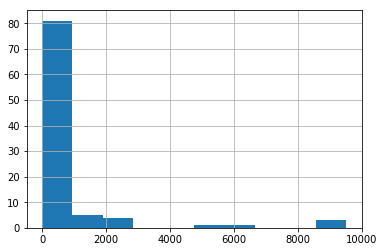

In [868]:
final_scores['tot_comments'].hist()

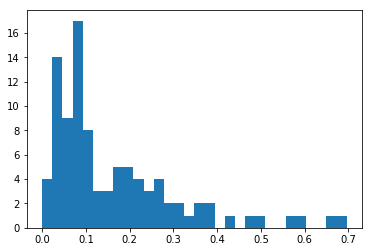

In [869]:
final_scores['calm_score'].hist(grid=False, bins=30)

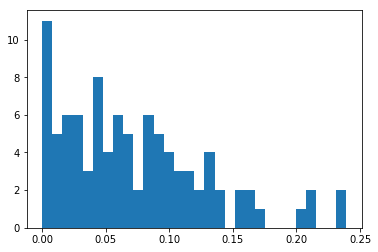

In [870]:
final_scores['funny_score'].hist(grid=False, bins=30)

In [920]:
calm_vid = calm_list.iloc[[1,3,5],].loc[:,'videos'].values
funny_vid = funny_list.iloc[[0,6, 17],].loc[:,'videos'].values
other_vid = upset_list.iloc[[3,5,21],].loc[:,'videos'].values

In [921]:
# Create new SQL db with predictions per channel
calm_vid

array(['3xa0Eop0SGc', '00cn-2GnPtI', '8cJ69S9l0lQ'], dtype=object)

In [944]:
i=0
for vid in calm_vid:
    with open('metadata/' + vid +'.info.json') as mtda:
        metadata = json.load(mtda)
        metadata = pd.DataFrame.from_dict(metadata, orient='index')
        metadata = metadata.loc[['uploader', 'uploader_url', 'thumbnail', 'webpage_url','title']]
 
    if i ==0:
        channels_final = metadata.transpose()
    else:
        channels_final = pd.concat([channels_final,metadata.transpose()])
    i+=1
channels_final['label'] = 'calm'
channels_final

        
        
        

,uploader,uploader_url,thumbnail,webpage_url,title,label
0,Cook with Mayura Marathi,http://www.youtube.com/channel/UCdNz03L-XqXrPF...,https://i.ytimg.com/vi/3xa0Eop0SGc/maxresdefau...,https://www.youtube.com/watch?v=3xa0Eop0SGc,Tandoori Chicken without oven / Quick and Easy...,calm
0,Cook with Mansi,http://www.youtube.com/channel/UCKnRNV6x7s-ZSD...,https://i.ytimg.com/vi/00cn-2GnPtI/maxresdefau...,https://www.youtube.com/watch?v=00cn-2GnPtI,Chocolate cake recipe - Eggless chocolate cake...,calm
0,Tess Cooks 4u,http://www.youtube.com/channel/UClcWrXNVItYUqo...,https://i.ytimg.com/vi/8cJ69S9l0lQ/maxresdefau...,https://www.youtube.com/watch?v=8cJ69S9l0lQ,How To Make Best Classic Pad Thai ~ Chicken Sh...,calm


In [945]:

for vid in funny_vid:
    with open('metadata/' + vid +'.info.json') as mtda:
        metadata = json.load(mtda)
        metadata = pd.DataFrame.from_dict(metadata, orient='index')
        metadata = metadata.loc[['uploader', 'uploader_url', 'thumbnail', 'webpage_url','title']]
    if i ==0:
        channels_final = metadata.transpose()
    else:
        channels_final = pd.concat([channels_final,metadata.transpose()])
    i+=1
        

/Users/kristenbrown/miniconda3/envs/insight/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  # Remove the CWD from sys.path while we load stuff.


In [946]:

for vid in other_vid:
    with open('metadata/' + vid +'.info.json') as mtda:
        metadata = json.load(mtda)
        metadata = pd.DataFrame.from_dict(metadata, orient='index')
        metadata = metadata.loc[['uploader', 'uploader_url', 'thumbnail', 'webpage_url','title']]
    if i ==0:
        channels_final = metadata.transpose()
    else:
        channels_final = pd.concat([channels_final,metadata.transpose()])
    i+=1

channels_final
        

/Users/kristenbrown/miniconda3/envs/insight/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  # Remove the CWD from sys.path while we load stuff.


,label,thumbnail,title,uploader,uploader_url,webpage_url
0,calm,https://i.ytimg.com/vi/3xa0Eop0SGc/maxresdefau...,Tandoori Chicken without oven / Quick and Easy...,Cook with Mayura Marathi,http://www.youtube.com/channel/UCdNz03L-XqXrPF...,https://www.youtube.com/watch?v=3xa0Eop0SGc
0,calm,https://i.ytimg.com/vi/00cn-2GnPtI/maxresdefau...,Chocolate cake recipe - Eggless chocolate cake...,Cook with Mansi,http://www.youtube.com/channel/UCKnRNV6x7s-ZSD...,https://www.youtube.com/watch?v=00cn-2GnPtI
0,calm,https://i.ytimg.com/vi/8cJ69S9l0lQ/maxresdefau...,How To Make Best Classic Pad Thai ~ Chicken Sh...,Tess Cooks 4u,http://www.youtube.com/channel/UClcWrXNVItYUqo...,https://www.youtube.com/watch?v=8cJ69S9l0lQ
0,NaN,https://i.ytimg.com/vi/-uckB4CnVeE/maxresdefau...,The Best Ever Vegan Grilled Cheese,Tasty,http://www.youtube.com/channel/UCJFp8uSYCjXOMn...,https://www.youtube.com/watch?v=-uckB4CnVeE
0,NaN,https://i.ytimg.com/vi/9LM9zAn4hDA/maxresdefau...,Quick and Easy Pasta Salad Recipe,The Cooking Foodie,http://www.youtube.com/channel/UCqZ8IpRdoyQ3Qj...,https://www.youtube.com/watch?v=9LM9zAn4hDA
0,NaN,https://i.ytimg.com/vi/5FNY9qMOpdY/hqdefault.jpg,"Instant Pot Turkey, Stuffing and Gravy",Pressure Luck Cooking,http://www.youtube.com/channel/UCWP5zYusIJqJCK...,https://www.youtube.com/watch?v=5FNY9qMOpdY
0,NaN,https://i.ytimg.com/vi/-DZxqe-tDtg/maxresdefau...,Yummy cooking spiders recipe - Cooking skill,Natural Life TV,http://www.youtube.com/channel/UCwbXPUMNQwUGCG...,https://www.youtube.com/watch?v=-DZxqe-tDtg
0,NaN,https://i.ytimg.com/vi/BEvcxePLHbU/maxresdefau...,What is the secret to making AMAZING pie dough?,Oh Yum with Anna Olson,http://www.youtube.com/channel/UCr_RedQch0OK-f...,https://www.youtube.com/watch?v=BEvcxePLHbU
0,NaN,https://i.ytimg.com/vi/50cMrTA26tw/maxresdefau...,MEGA CRUNCH! - DOUBLE MEAT POCKET PIZZAS!,AlmazanKitchen,http://www.youtube.com/channel/UCVVAnxQ2YMC_ql...,https://www.youtube.com/watch?v=50cMrTA26tw


In [947]:
channels_final.to_csv('channels.csv', index=False)

## gensim


In [159]:
# following https://hackernoon.com/stepping-into-nlp-word2vec-with-gensim-e7c54d9a450a

# Word2vec model for embeddings  
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
from sklearn.decomposition import PCA

# Defining the structure of our word2vec model 

# Size is the dimentionality feature of the model 
model_1 = Word2Vec(size=300, min_count=1)
#Feeding Our coupus 
model_1.build_vocab(emojitraining['comment_lemmats'])
#Lenth of the courpus 
total_examples = model_1.corpus_count

#traning our model
model_1.train(emojitraining['comment_lemmats'], total_examples=total_examples, epochs=10)


(38957, 48820)

/Users/kristenbrown/miniconda3/envs/insight/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/kristenbrown/miniconda3/envs/insight/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


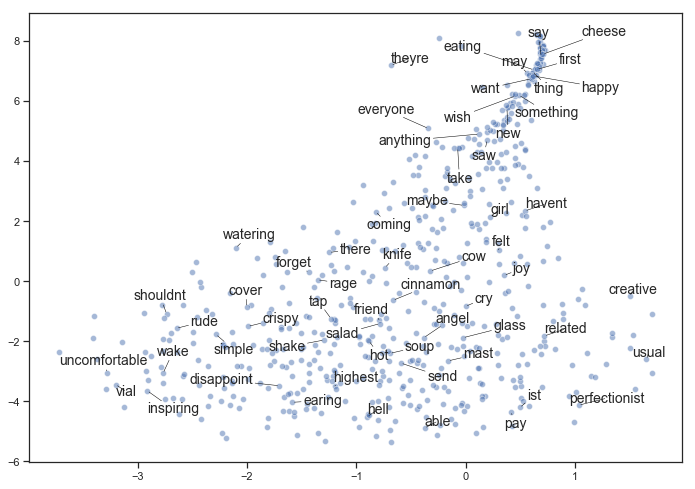

In [1000]:
from sklearn.manifold import TSNE

df = model_1[model_1.wv.vocab]

# Filter the list of vectors to include only those that Word2Vec has a vector for
vector_list = [model_1[word] for word in words if word in model_1.wv.vocab]

# Create a list of the words corresponding to these vectors
words_filtered = [word for word in words if word in model_1.wv.vocab]

# Zip the words together with their vector representations
word_vec_zip = zip(words_filtered, vector_list)

# Cast to a dict so we can turn it into a DataFrame
word_vec_dict = dict(word_vec_zip)
df = pd.DataFrame.from_dict(word_vec_dict, orient='index')
df.head(3)

# Initialize t-SNE
tsne = TSNE(n_components = 2, init = 'random', random_state = 10, perplexity = 100)

# Use only 400 rows to shorten processing time
tsne_df = tsne.fit_transform(df[:600])
sns.set_style('ticks')
# Initialize figure
fig, ax = plt.subplots(figsize = (11.7, 8.27))
sns.scatterplot(tsne_df[:, 0], tsne_df[:, 1], alpha = 0.5)

# Import adjustText, initialize list of texts
from adjustText import adjust_text
texts = []
words_to_plot = list(np.arange(0, 600, 10))

# Append words to list
for word in words_to_plot:
    texts.append(plt.text(tsne_df[word, 0], tsne_df[word, 1], df.index[word], fontsize = 14))
    
# Plot text using adjust_text (because overlapping text is hard to read)
adjust_text(texts, force_points = 0.4, force_text = 0.4, 
            expand_points = (2,1), expand_text = (1,2),
            arrowprops = dict(arrowstyle = "-", color = 'black', lw = 0.5))

plt.show()

In [997]:
def avg_word_vectors(wordlist,size):
    sumvec=np.zeros(shape=(1,size))
    wordcnt=0

    for w in wordlist:
        if w in model_1:
            sumvec += model_1[w]
            wordcnt +=1

        if wordcnt ==0:
            return sumvec

        else:
            return sumvec / wordcnt
        
X_train=np.concatenate([avg_word_vectors(w,300) for w in X_train])
X_test=np.concatenate([avg_word_vectors(w,300) for w in X_test])

/Users/kristenbrown/miniconda3/envs/insight/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  
/Users/kristenbrown/miniconda3/envs/insight/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


In [998]:
from sklearn import linear_model



clf = linear_model.SGDClassifier(loss='log')
clf.fit(X_train, ytrain)
p=clf.predict_proba(X_test)

/Users/kristenbrown/miniconda3/envs/insight/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


ValueError: bad input shape (1407, 3)

ValueError: setting an array element with a sequence.

In [160]:
# fit a 2d PCA model to the vectors

# X holds the vectors of n dimentions for each word in our vocab
X = model_1[model_1.wv.vocab]

# We are reducing the n dimentions to 2d 
pca = PCA(n_components=2)
result = pca.fit_transform(X)

/Users/kristenbrown/miniconda3/envs/insight/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  after removing the cwd from sys.path.


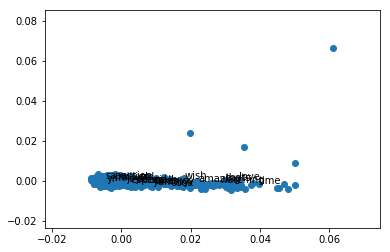

In [163]:
import matplotlib.pyplot as plt
# create a scatter plot of the projection
plt.scatter(result[:, 0], result[:, 1])
words = list(model_1.wv.vocab)
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.show()

In [1018]:
test_com = comments.drop(['index', 'merged_comments','tot_text_len','avg_likes', 'avg_dislikes', 'tot_likes', 'tot_dislikes', 'avg_text_len','tot_comments', 'emojis', 'num_emojis'], 1)
test_com['desc'] = 'a'
test_com['category'] = 'a'



In [1019]:
test_com[0:11].to_csv('test.csv')

In [1017]:
test_com[0:11]

,channel_id,videos,comments,desc,category
0,UCVVAnxQ2YMC_qlc7QfPA2YQ,50cMrTA26tw,I just ate and this video makes me hungry,,
1,UCVVAnxQ2YMC_qlc7QfPA2YQ,50cMrTA26tw,That looks so freakin good!,,
2,UCVVAnxQ2YMC_qlc7QfPA2YQ,50cMrTA26tw,Could you please get us the recipes for the sp...,,
3,UCVVAnxQ2YMC_qlc7QfPA2YQ,50cMrTA26tw,Your channel is f***ing amazing Keep going,,
4,UCVVAnxQ2YMC_qlc7QfPA2YQ,50cMrTA26tw,Give me a napkin. My mouth is watering.,,
5,UCVVAnxQ2YMC_qlc7QfPA2YQ,50cMrTA26tw,"Damn.. making me so hungry, this a crime :)",,
6,UCVVAnxQ2YMC_qlc7QfPA2YQ,50cMrTA26tw,lIKE IT,,
7,UCVVAnxQ2YMC_qlc7QfPA2YQ,50cMrTA26tw,I would love a plate of food from y'all,,
8,UCVVAnxQ2YMC_qlc7QfPA2YQ,50cMrTA26tw,"You guys need to open a deli/bar and grill, no...",,
9,UCVVAnxQ2YMC_qlc7QfPA2YQ,50cMrTA26tw,Magnifico como siempre abriendo el apetito.,,
